In [1]:
import pandas as pd 

# Importation des données 

positions = pd.read_excel("Positions_BigData.xlsx") # Positions du fonds  
passif = pd.read_excel("Passif_Année 2_Albert School.xlsx") # Information sur la collecte des fonds 
bench_lines = pd.read_excel("Bench_Lignes.xlsx") # Composition mensuelle du benchmark 
caracteristiques_parts = pd.read_excel("Caracteristiques_Parts.xlsx") # En lien avec le banchmark 
fixing = pd.read_excel("Fixing.xlsx") # Taux de change des devises ; attention : nettoyage nécessaire 
frais = pd.read_excel("Frais.xlsx") # Frais payés par les fonds quotidiennement 
taux = pd.read_excel("Historique_Taux.xlsx") # Taux de change des devises ; attention : nettoyage nécessaire 
perf_bench = pd.read_excel("Perf_Bench.xlsx") # Performance du benchmark 
perf_fonds = pd.read_excel("Perf_Fonds.xlsx") # Performance du fonds 
indice_reference= pd.read_excel("USGG10YR Index.xlsx")
fixing_BDF = pd.read_excel("BDD_EDR_Taux_Change_EUR_USD_BDF.xlsx") # Indice de référence

Partie 1 : Dataset passif

In [2]:
passif

,Owner,Business Relationship,Fund,Share,Share Type,ISIN,Date,AUM (€),Quantity,Net Inflows YTD (€),Net Inflows MTD (€),Master Distributor / Fund Buyer (Business Relationship) (Business Relationship),BR Segmentation (Business Relationship) (Business Relationship),Reporting Line (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Asset Class (Fund) (EdRAM Product),Sub Asset Class (Fund) (EdRAM Product)
0,PBIA,"EDR EUROPE, SUCCURSALE EN BELGIQUE / Managed",EdR Fund Big Data,EdR Fund Big Data CRM - EUR,CRM,LU2596456975,2024-09-30 06:00:00,161237839.0,1260458,24373424,344342,EDMOND DE ROTHSCHILD (EUROPE),Bank / EdR Private Banking,EdR Private Banking,BELGIUM,Equity,International & Thematic Equity
1,Sharon ZAGHDOUN,CNP ASSURANCES (Fonds Propres),EdR Fund Big Data,EdR Fund Big Data N2 - EUR,N2,LU2053387994,2024-09-30 06:00:00,97237036.0,552013,2043903,0,NaN,Insurance Company / Own Account,Institutional,FRANCE,Equity,International & Thematic Equity
2,Aymeric SALLE DE CHOU,ERAFP (Investment Advice),EdR Fund Big Data,EdR Fund Big Data N - EUR,N,LU1244894827,2024-09-30 06:00:00,78176572.0,225137,15082535,0,NaN,Pension Fund / Employee Saving Scheme,Institutional,FRANCE,Equity,International & Thematic Equity
3,Aymeric SALLE DE CHOU,FRR (FONDS DE RESERVE POUR LES RETRAITES),EdR Fund Big Data,EdR Fund Big Data P - EUR,P,LU2225826366,2024-09-30 06:00:00,76404369.0,525658,-10000000,0,NaN,Sovereign / Pension Fund,Institutional,FRANCE,Equity,International & Thematic Equity
4,Nicolas BONARDO,GENERALI VIE (DISTRIBUTION),EdR Fund Big Data,EdR Fund Big Data A - EUR,A,LU1244893696,2024-09-30 06:00:00,73716773.0,245346,-1599030,56470,GENERALI VIE,Insurance Company / Unit Link,Wholesale,FRANCE,Equity,International & Thematic Equity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85708,PBIA (Suisse),EDR SUISSE - CUSTODIAN,EdR Fund Big Data,EdR Fund Big Data I - USD,I,LU1244894314,2020-09-30 06:00:00,-943283.0,-6379,-818045,-330835,NaN,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Equity,International & Thematic Equity
85709,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2020-09-30 06:00:00,-1107146.0,-65,0,0,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging)
85710,PBIA (Suisse),EDR SUISSE - CUSTODIAN,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2020-09-30 06:00:00,-1445110.0,-85,-1435301,0,NaN,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Fixed Income,Corporate Debt (excl. Emerging)
85711,Custodian Bank « no owner »,UBS AG - CUSTODIAN,EdR Fund Emerging Credit,EdR Fund Emerging Credit I - EUR (H),I,LU1080016071,2020-09-30 06:00:00,-2643804.0,-20600,-3170902,-2643804,NaN,Bank / Retail,Wholesale,SWITZERLAND,Fixed Income,Emerging Debt


In [3]:
print(passif.columns)

Index(['Owner', 'Business Relationship', 'Fund', 'Share', 'Share Type', 'ISIN',
       'Date', 'AUM (€)', 'Quantity', 'Net Inflows YTD (€)',
       'Net Inflows MTD (€)',
       'Master Distributor / Fund Buyer (Business Relationship) (Business Relationship)',
       'BR Segmentation (Business Relationship) (Business Relationship)',
       'Reporting Line (Business Relationship) (Business Relationship)',
       'Business Country (Business Relationship) (Business Relationship)',
       'Asset Class (Fund) (EdRAM Product)',
       'Sub Asset Class (Fund) (EdRAM Product)'],
      dtype='object')


In [4]:
# Etape 1 : Nettoyage du dataset

colonnes_conserver = [
    'Business Relationship', 
    'Fund', 
    'Share Type', 
    'Date', 
    'AUM (€)', 
    'Quantity', 
    'Net Inflows YTD (€)',
    'Net Inflows MTD (€)', 
    'BR Segmentation (Business Relationship) (Business Relationship)',
    'Reporting Line (Business Relationship) (Business Relationship)',
    'Business Country (Business Relationship) (Business Relationship)',
    'Asset Class (Fund) (EdRAM Product)'
]

passif_ok = passif[colonnes_conserver]

passif_ok = passif_ok[passif_ok['Fund'] == 'EdR Fund Big Data']

passif_ok


,Business Relationship,Fund,Share Type,Date,AUM (€),Quantity,Net Inflows YTD (€),Net Inflows MTD (€),BR Segmentation (Business Relationship) (Business Relationship),Reporting Line (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Asset Class (Fund) (EdRAM Product)
0,"EDR EUROPE, SUCCURSALE EN BELGIQUE / Managed",EdR Fund Big Data,CRM,2024-09-30 06:00:00,161237839.0,1260458,24373424,344342,Bank / EdR Private Banking,EdR Private Banking,BELGIUM,Equity
1,CNP ASSURANCES (Fonds Propres),EdR Fund Big Data,N2,2024-09-30 06:00:00,97237036.0,552013,2043903,0,Insurance Company / Own Account,Institutional,FRANCE,Equity
2,ERAFP (Investment Advice),EdR Fund Big Data,N,2024-09-30 06:00:00,78176572.0,225137,15082535,0,Pension Fund / Employee Saving Scheme,Institutional,FRANCE,Equity
3,FRR (FONDS DE RESERVE POUR LES RETRAITES),EdR Fund Big Data,P,2024-09-30 06:00:00,76404369.0,525658,-10000000,0,Sovereign / Pension Fund,Institutional,FRANCE,Equity
4,GENERALI VIE (DISTRIBUTION),EdR Fund Big Data,A,2024-09-30 06:00:00,73716773.0,245346,-1599030,56470,Insurance Company / Unit Link,Wholesale,FRANCE,Equity
...,...,...,...,...,...,...,...,...,...,...,...,...
85697,UNION BANCAIRE PRIVEE / CUSTODIAN,EdR Fund Big Data,A,2020-09-30 06:00:00,-160370.0,-1015,-44711,0,Bank / Private Banking,Wholesale,SWITZERLAND,Equity
85701,EDR SUISSE - CUSTODIAN,EdR Fund Big Data,A,2020-09-30 06:00:00,-445537.0,-3065,-765651,-389135,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Equity
85705,EDR SUISSE - CUSTODIAN,EdR Fund Big Data,J,2020-09-30 06:00:00,-745370.0,-8309,-757843,-134673,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Equity
85707,EDR SUISSE - CUSTODIAN,EdR Fund Big Data,A,2020-09-30 06:00:00,-930157.0,-6585,-897103,-154314,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Equity


In [5]:
print(passif_ok.columns)

Index(['Business Relationship', 'Fund', 'Share Type', 'Date', 'AUM (€)',
       'Quantity', 'Net Inflows YTD (€)', 'Net Inflows MTD (€)',
       'BR Segmentation (Business Relationship) (Business Relationship)',
       'Reporting Line (Business Relationship) (Business Relationship)',
       'Business Country (Business Relationship) (Business Relationship)',
       'Asset Class (Fund) (EdRAM Product)'],
      dtype='object')


In [6]:
# Etape 2 : Catégorisation du dataset 

# Grade 1 : Catégorisation par années

passif_ok['Date'] = pd.to_datetime(passif_ok['Date'])

# Liste des années et colonnes à conserver 
annees = [2020, 2021, 2022, 2023, 2024]
colonnes_conserver = [
    'Share Type',
    'Date', 
    'AUM (€)', 
    'Net Inflows YTD (€)', 
    'Net Inflows MTD (€)', 
    'BR Segmentation (Business Relationship) (Business Relationship)', 
    'Business Country (Business Relationship) (Business Relationship)'
]

# Dictionnaire pour stocker les dataframes par année
passif_annees = {}

for annee in annees:
    # 1. Création du DataFrame pour l'année donnée
    df_annee = passif_ok[passif_ok['Date'].dt.year == annee].copy()
    
    # 2. Ne garder que les colonnes souhaitées
    df_annee = df_annee[colonnes_conserver]
    
    # 3. Créer la colonne 'Month' à partir du mois de la colonne 'Date'
    df_annee['Month'] = df_annee['Date'].dt.month_name()
    
    # Stocker le dataframe dans un dictionnaire pour y accéder plus facilement
    passif_annees[annee] = df_annee

In [7]:
passif_annees[2020]

,Share Type,Date,AUM (€),Net Inflows YTD (€),Net Inflows MTD (€),BR Segmentation (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Month
78825,N,2020-12-31 05:00:00,40189753.0,14683322,1342189,AM company / Fund of Funds,SPAIN,December
78827,N,2020-12-31 05:00:00,36606500.0,31496450,0,Insurance Company / Own Account,FRANCE,December
78832,A,2020-12-31 05:00:00,31169650.0,-1478316,-357732,Insurance Company / Unit Link,FRANCE,December
78835,N,2020-12-31 05:00:00,26544942.0,18430774,0,Insurance Company / Mutuelle,FRANCE,December
78839,K,2020-12-31 05:00:00,24487532.0,-501057,-374860,Bank / EdR Private Banking,BELGIUM,December
...,...,...,...,...,...,...,...,...
85697,A,2020-09-30 06:00:00,-160370.0,-44711,0,Bank / Private Banking,SWITZERLAND,September
85701,A,2020-09-30 06:00:00,-445537.0,-765651,-389135,Bank / EdR Private Banking,SWITZERLAND,September
85705,J,2020-09-30 06:00:00,-745370.0,-757843,-134673,Bank / EdR Private Banking,SWITZERLAND,September
85707,A,2020-09-30 06:00:00,-930157.0,-897103,-154314,Bank / EdR Private Banking,SWITZERLAND,September


In [8]:
# Grade 2 : Catégorisation par BR Segmentation

# Dictionnaire pour stocker les DataFrames organisés
passif_segmentation = {}

# Identifier toutes les valeurs uniques de la colonne pour les 5 années
valeurs_segmentation = set()

for annee, df in passif_annees.items():
    valeurs_segmentation.update(df['BR Segmentation (Business Relationship) (Business Relationship)'].unique())

# Créer un mapping des valeurs de segmentation avec des clés numériques pour simplifier l'accès
valeurs_segmentation = sorted(list(valeurs_segmentation))
segmentation_mapping = {val: idx for idx, val in enumerate(valeurs_segmentation)}

# Afficher le mapping pour l'accès facile
print("Clés de segmentation :")
for val, idx in segmentation_mapping.items():
    print(f"{idx}: {val}")

# Créer des DataFrames séparés pour chaque combinaison année-valeur unique
for annee, df_annee in passif_annees.items():
    passif_segmentation[annee] = {}
    for valeur_segmentation, idx in segmentation_mapping.items():
        # Filtrer les lignes correspondant à la valeur actuelle
        df_segmentation = df_annee[
            df_annee['BR Segmentation (Business Relationship) (Business Relationship)'] == valeur_segmentation
        ].copy()
        # Ajouter le DataFrame au dictionnaire à deux niveaux
        passif_segmentation[annee][idx] = df_segmentation

Clés de segmentation :
0: AM company / EdR Fund of Funds
1: AM company / Fund of Funds
2: AM company / Independant
3: AM company / Own account
4: Bank / EdR Private Banking
5: Bank / Online Broker
6: Bank / Own Account
7: Bank / Private Banking
8: Bank / Retail
9: Bank / Trading Platform
10: Independant Financial Advisor
11: Insurance Company / Mutuelle
12: Insurance Company / Own Account
13: Insurance Company / Retirement Scheme
14: Insurance Company / Unit Link
15: Multi Familly Office / Wealth manager
16: Pension Fund / Employee Saving Scheme
17: Pension Fund / Other
18: Single Family Office
19: Sovereign / Pension Fund
20: Unknown


In [9]:
passif_segmentation[2023][4]

,Share Type,Date,AUM (€),Net Inflows YTD (€),Net Inflows MTD (€),BR Segmentation (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Month
17808,CRM,2023-12-31 05:00:00,119520743.0,114568489,25421248,Bank / EdR Private Banking,BELGIUM,December
17828,K,2023-12-31 05:00:00,31079762.0,66945,-1726504,Bank / EdR Private Banking,BELGIUM,December
17871,CR,2023-12-31 05:00:00,10602166.0,-2600824,-249524,Bank / EdR Private Banking,FRANCE,December
17878,A,2023-12-31 05:00:00,8991647.0,-919229,-120712,Bank / EdR Private Banking,FRANCE,December
17885,A,2023-12-31 05:00:00,7924550.0,2857946,780816,Bank / EdR Private Banking,PORTUGAL,December
...,...,...,...,...,...,...,...,...
39368,A,2023-01-31 05:00:00,0.0,-1033,-1033,Bank / EdR Private Banking,SWITZERLAND,January
39403,A,2023-01-31 05:00:00,-1.0,0,0,Bank / EdR Private Banking,FRANCE,January
39405,CR,2023-01-31 05:00:00,-1.0,0,0,Bank / EdR Private Banking,FRANCE,January
39433,K,2023-01-31 05:00:00,-27560.0,-40005,-40005,Bank / EdR Private Banking,LUXEMBOURG,January


In [10]:
# Grade 2 BIS : Catégorisation par pays 

In [11]:
# Etape 3 : Réalisation d'un graphique interactif

import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Création de la liste des années et des segmentations
annees = list(passif_segmentation.keys())
segmentations = list(next(iter(passif_segmentation.values())).keys())

# Layout de l'application Dash
app.layout = html.Div([
    html.H1("Visualisation interactive des Net Inflows MTD (€)", style={"textAlign": "center"}),
    
    # Menu déroulant pour sélectionner l'année
    html.Div([
        html.Label("Sélectionnez une année :"),
        dcc.Dropdown(
            id="year-dropdown",
            options=[{"label": str(annee), "value": annee} for annee in annees],
            value=annees[0]  # Année par défaut
        )
    ], style={"width": "30%", "display": "inline-block", "verticalAlign": "top"}),

    # Menu déroulant pour sélectionner la segmentation
    html.Div([
        html.Label("Sélectionnez une segmentation :"),
        dcc.Dropdown(
            id="segmentation-dropdown",
            options=[{"label": seg, "value": seg} for seg in segmentations],
            value=segmentations[0]  # Segmentation par défaut
        )
    ], style={"width": "30%", "display": "inline-block", "verticalAlign": "top", "marginLeft": "10px"}),

    # Graphique
    dcc.Graph(id="bar-chart"),

    # Note en bas de page
    html.Div("Les données affichées sont basées sur les Net Inflows MTD (€) par mois.", 
             style={"textAlign": "center", "marginTop": "20px", "fontStyle": "italic"})
])

# Callback pour mettre à jour le graphique en fonction des menus déroulants
@app.callback(
    Output("bar-chart", "figure"),
    Input("year-dropdown", "value"),
    Input("segmentation-dropdown", "value")
)
def update_graph(selected_year, selected_segmentation):
    # Récupérer le DataFrame correspondant
    df = passif_segmentation[selected_year][selected_segmentation]

    # Calculer la somme des Net Inflows MTD (€) par mois
    df_grouped = df.groupby("Month", as_index=False).agg({"Net Inflows MTD (€)": "sum"})

    # Ordre des mois
    month_order = [
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December"
    ]
    df_grouped["Month"] = pd.Categorical(df_grouped["Month"], categories=month_order, ordered=True)
    df_grouped = df_grouped.sort_values("Month")

    # Création du graphique
    fig = px.bar(
        df_grouped,
        x="Month",
        y="Net Inflows MTD (€)",
        text="Net Inflows MTD (€)",
        title=f"Net Inflows MTD (€) - {selected_year} - {selected_segmentation}",
        labels={"Net Inflows MTD (€)": "Net Inflows MTD (€)", "Month": "Mois"}
    )

    # Personnalisation du style
    fig.update_traces(marker_color=px.colors.sequential.Blues, texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(
        xaxis_title="Month",
        yaxis_title="Net Inflows MTD (€)",
        font=dict(size=12),
        plot_bgcolor="white",
        title=dict(x=0.5),
        margin=dict(l=40, r=40, t=40, b=40)
    )
    return fig

Partie 2 : Nettotage du dataset perf_funds

In [12]:
perf_fonds

,PORTFOLIO_IK_PASSIF,SECURITY_ID,SECURITY_ISIN,SECURITY_NAME,PERFORMANCE_START_DATE,ANALYSIS_DATE_FULL,TWR_NET_CUMULATED,TWR_1DC,TWR_1WC,TWR_1MC,...,TWR_3YR,TWR_5YR,TWR_10YR,TWR_1YAnn,TWR_2YAnn,TWR_3YAnn,TWR_5YAnn,TWR_10YAnn,TWR_BRUT_CUMULATED,REPORTING_CURRENCY
0,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-30 00:00:00.000,17.927670,-0.502563,0.270115,0.669503,...,16.006172,39.203600,92.643768,17.886389,17.875147,5.068876,6.831332,6.770705,30.522838,EUR
1,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-27 00:00:00.000,18.018223,-0.436987,2.007895,1.177986,...,13.941592,40.611971,93.422332,19.728028,18.570408,4.442403,7.046396,6.811816,30.671755,EUR
2,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-26 00:00:00.000,18.097306,1.218895,2.455613,1.622061,...,13.733971,41.723201,94.271272,19.952784,18.159042,4.370837,7.214873,6.860493,30.804608,EUR
3,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-25 00:00:00.000,17.879375,0.221647,1.221825,0.398312,...,12.364368,40.684971,92.299451,17.705270,17.147817,3.955013,7.057497,6.751622,30.431886,EUR
4,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-24 00:00:00.000,17.839834,0.477712,0.008461,0.176274,...,12.115866,39.456360,90.102927,16.237306,17.043862,3.882068,6.870057,6.629155,30.362838,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49447,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-06-03 00:00:00.000,1.000200,0.482218,1.574083,0.482218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000545,USD
49448,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-05-31 00:00:00.000,0.995400,0.302297,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995571,USD
49449,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-05-30 00:00:00.000,0.992400,0.781964,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992513,USD
49450,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-05-29 00:00:00.000,0.984700,-1.530000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.984756,USD


In [13]:
print(perf_fonds.columns)

Index(['PORTFOLIO_IK_PASSIF', 'SECURITY_ID', 'SECURITY_ISIN', 'SECURITY_NAME',
       'PERFORMANCE_START_DATE', 'ANALYSIS_DATE_FULL', 'TWR_NET_CUMULATED',
       'TWR_1DC', 'TWR_1WC', 'TWR_1MC', 'TWR_3MC', 'TWR_6MC', 'TWR_YTD',
       'TWR_1YC', 'TWR_2YC', 'TWR_3YC', 'TWR_5YC', 'TWR_10YC', 'TWR_1WR',
       'TWR_1MR', 'TWR_3MR', 'TWR_6MR', 'TWR_1YR', 'TWR_2YR', 'TWR_3YR',
       'TWR_5YR', 'TWR_10YR', 'TWR_1YAnn', 'TWR_2YAnn', 'TWR_3YAnn',
       'TWR_5YAnn', 'TWR_10YAnn', 'TWR_BRUT_CUMULATED', 'REPORTING_CURRENCY'],
      dtype='object')


In [14]:
print(perf_fonds['SECURITY_NAME'].unique().tolist())

['EdR SICAV - Euro Sustainable Equity A - EUR', 'EdR SICAV - Euro Sustainable Equity I - EUR', 'EdR SICAV - Euro Sustainable Equity K - EUR', 'EdR Fund Emerging Credit A - EUR (H)', 'EdR Fund Emerging Credit B - EUR (H)', 'EdR Fund Emerging Credit I - EUR (H)', 'EdR Fund Emerging Credit A - USD', 'EdR Fund Emerging Credit B - USD', 'EdR Fund Emerging Credit I - USD', 'EdR Fund Euro High Yield A - EUR', 'EdR Fund Euro High Yield A - CHF', 'EdR Fund Euro High Yield A - USD (H)', 'EdR Fund Euro High Yield B - EUR', 'EdR Fund Euro High Yield I - EUR', 'EdR Fund Euro High Yield J - EUR', 'EdR Fund Euro High Yield N - EUR', 'EdR Fund Euro High Yield O - EUR', 'EdR Fund Euro High Yield R - EUR', 'EdR Fund Big Data A - EUR', 'EdR Fund Big Data A - USD', 'EdR Fund Big Data A - CHF', 'EdR Fund Big Data I - EUR', 'EdR Fund Big Data I - USD', 'EdR Fund Big Data K - EUR', 'EdR Fund Big Data N - EUR', 'EdR Fund Big Data N - USD', 'EdR Fund Big Data N CHF', 'EdR Fund Big Data R - EUR', 'EdR Fund Big 

In [15]:
# Etape 1 : Nettoyage du dataset 

import pandas as pd

# Création d'un nouveau dataframe avec les colonnes sélectionnées
colonnes_a_conserver = [
    'SECURITY_NAME', 
    'PERFORMANCE_START_DATE', 
    'ANALYSIS_DATE_FULL', 
    'TWR_NET_CUMULATED', 
    'TWR_1MC', 
    'TWR_YTD', 
    'REPORTING_CURRENCY'
]
perf_fonds_reduit = perf_fonds[colonnes_a_conserver]

# Filtrer les lignes avec des valeurs spécifiques dans 'SECURITY_NAME'
valeurs_security_name = [
    'EdR Fund Big Data A - EUR', 'EdR Fund Big Data A - USD', 'EdR Fund Big Data A - CHF',
    'EdR Fund Big Data I - EUR', 'EdR Fund Big Data I - USD', 'EdR Fund Big Data K - EUR',
    'EdR Fund Big Data N - EUR', 'EdR Fund Big Data N - USD', 'EdR Fund Big Data N CHF',
    'EdR Fund Big Data R - EUR', 'EdR Fund Big Data R - USD', 'EdR Fund Big Data CR - USD',
    'EdR Fund Big Data CRD - USD', 'EdR Fund Big Data CR - EUR', 'EdR Fund Big Data CRD - EUR',
    'EdR Fund Big Data B - EUR', 'EdR Fund Big Data J - USD', 'EdR Fund Big Data N2 - EUR',
    'EdR Fund Big Data P - EUR', 'EdR Fund Big Data P - USD', 'EdR Fund Big Data CRM - EUR'
]
perf_fonds_ok = perf_fonds_reduit[perf_fonds_reduit['SECURITY_NAME'].isin(valeurs_security_name)]

In [16]:
perf_fonds_ok = perf_fonds_ok.dropna(subset=['TWR_1MC'])

In [17]:
perf_fonds_ok

,SECURITY_NAME,PERFORMANCE_START_DATE,ANALYSIS_DATE_FULL,TWR_NET_CUMULATED,TWR_1MC,TWR_YTD,REPORTING_CURRENCY
17062,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-30 00:00:00.000,3.004599,2.298185,12.747195,EUR
17063,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-27 00:00:00.000,3.009699,2.471826,12.938572,EUR
17064,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-26 00:00:00.000,2.999399,2.121140,12.552066,EUR
17065,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-25 00:00:00.000,2.964599,0.936298,11.246201,EUR
17066,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-24 00:00:00.000,2.991999,1.869191,12.274382,EUR
...,...,...,...,...,...,...,...
49346,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-11 00:00:00.000,1.028000,0.429855,NaN,EUR
49347,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-06 00:00:00.000,1.021400,-0.214928,NaN,EUR
49348,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-05 00:00:00.000,1.016500,-0.693630,NaN,EUR
49349,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-04 00:00:00.000,1.022600,-0.097694,NaN,EUR


In [18]:
print(perf_fonds_ok.columns)

Index(['SECURITY_NAME', 'PERFORMANCE_START_DATE', 'ANALYSIS_DATE_FULL',
       'TWR_NET_CUMULATED', 'TWR_1MC', 'TWR_YTD', 'REPORTING_CURRENCY'],
      dtype='object')


In [19]:
perf_fonds_ok['ANALYSIS_DATE_FULL'] = pd.to_datetime(perf_fonds_ok['ANALYSIS_DATE_FULL'])

# Filtrer les lignes en gardant uniquement celles avec une date à partir de septembre 2020 (inclus)
date_seuil = pd.Timestamp('2020-09-01')
perf_fonds_ok = perf_fonds_ok[perf_fonds_ok['ANALYSIS_DATE_FULL'] >= date_seuil]

In [20]:
def filter_end_of_month_by_asset(df):
    # Ajouter une colonne avec l'année et le mois pour identifier les groupes
    df['YEAR_MONTH'] = df['ANALYSIS_DATE_FULL'].dt.to_period('M')
    
    # Grouper par type d'actif, année, et mois, puis choisir la date la plus proche du 30
    filtered_df = df.groupby(['SECURITY_NAME', 'YEAR_MONTH']).apply(
        lambda group: group[group['ANALYSIS_DATE_FULL'].dt.day.isin([30, 29, 28])]
        .sort_values(by='ANALYSIS_DATE_FULL', ascending=False)  # Trier pour privilégier le 30
        .head(1)  # Garder la date la plus proche du 30
    )
    
    # Enlever l'index supplémentaire créé par groupby
    filtered_df.reset_index(drop=True, inplace=True)
    # Supprimer la colonne temporaire YEAR_MONTH
    filtered_df.drop(columns=['YEAR_MONTH'], inplace=True)
    
    return filtered_df

# Appliquer le filtre
perf_fonds_ok = filter_end_of_month_by_asset(perf_fonds_ok)

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\2606536292.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [21]:
# Permet de vérifier que tous les mois sont encore présents 

def obtenir_mois_2022(dataframe, colonne):
    # Filtrer les données de l'année 2022
    dataframe_2022 = dataframe[dataframe[colonne].dt.year == 2022]
    # Extraire les mois uniques
    mois_uniques = dataframe_2022[colonne].dt.month.unique()
    return sorted(mois_uniques)  # Trier pour une meilleure lisibilité

# Utilisation de la fonction
mois_2022 = obtenir_mois_2022(perf_fonds_ok, 'ANALYSIS_DATE_FULL')
print("Mois présents en 2022:", mois_2022)

Mois présents en 2022: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12]


In [22]:
# Filtrer les lignes qui dont la devise est EUR 
perf_fonds_ok = perf_fonds_ok[perf_fonds_ok['REPORTING_CURRENCY'] == 'EUR']

In [23]:
# Supprimer l'expression "- EUR", puis splitter la colonne 'SECURITY_NAME'
perf_fonds_ok['SECURITY_NAME'] = perf_fonds_ok['SECURITY_NAME'].str.replace(' - EUR', '', regex=False)

# Séparer la colonne 'SECURITY_NAME' en deux parties
perf_fonds_ok[['SECURITY_NAME', 'TYPE']] = perf_fonds_ok['SECURITY_NAME'].str.extract(r'^(.*) (\S+)$')

# Réorganiser les colonnes pour placer 'TYPE' juste après 'SECURITY_NAME'
colonnes_ordre = ['SECURITY_NAME', 'TYPE'] + [col for col in perf_fonds_ok.columns if col not in ['SECURITY_NAME', 'TYPE']]
perf_fonds_ok = perf_fonds_ok[colonnes_ordre]

In [24]:
print(perf_fonds_ok['TYPE'].unique().tolist())

['A', 'B', 'CR', 'CRD', 'CRM', 'I', 'K', 'N', 'N2', 'P', 'R']


In [25]:
colonnes_a_conserver1 = [
    'TYPE', 
    'ANALYSIS_DATE_FULL', 
    'TWR_1MC', 
]
perf_fonds_ok = perf_fonds_ok[colonnes_a_conserver1]

In [26]:
# Etape 2 : Catégorisation du dataset

# Créer un dataframe pour chaque année
perf_fonds_segmentation = {}

# Boucle pour filtrer les lignes selon l'année
for year in range(2020, 2025):  # Les années de 2020 à 2024 incluses
    df_annee = perf_fonds_ok[perf_fonds_ok['ANALYSIS_DATE_FULL'].dt.year == year].copy()
    
    # Étape 2 : Ajouter la colonne 'MONTH' avec le nom du mois en anglais
    df_annee['MONTH'] = df_annee['ANALYSIS_DATE_FULL'].dt.month_name()

    # Sauvegarde du dataframe pour chaque année dans un dictionnaire
    perf_fonds_segmentation[year] = df_annee


In [27]:
print(perf_fonds_segmentation[2024].columns)

Index(['TYPE', 'ANALYSIS_DATE_FULL', 'TWR_1MC', 'MONTH'], dtype='object')


In [28]:
print(perf_fonds_segmentation[2022]['MONTH'].unique().tolist())

['January', 'February', 'March', 'April', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


Partie 3 : Nottoyage du dataset perf_bench

In [29]:
perf_bench

,PORTFOLIO_IK_PASSIF,SECURITY_ID,SECURITY_ISIN,SECURITY_NAME,PERFORMANCE_START_DATE,ANALYSIS_DATE_FULL,TWR_NET_CUMULATED,TWR_1DC,TWR_1WC,TWR_1MC,...,TWR_2YR,TWR_3YR,TWR_5YR,TWR_10YR,TWR_1YAnn,TWR_2YAnn,TWR_3YAnn,TWR_5YAnn,TWR_10YAnn,REPORTING_CURRENCY
0,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-30 00:00:00.000,8.349381,-1.190579,1.495295,1.015053,...,49.491482,22.637191,47.460521,97.790638,20.191404,22.233089,7.032034,8.068276,7.052360,EUR
1,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-27 00:00:00.000,8.449985,0.760884,3.708218,2.232208,...,50.742243,21.206078,50.006750,100.486635,23.017136,22.742672,6.614448,8.438525,7.195233,EUR
2,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-26 00:00:00.000,8.386176,1.942572,2.925077,1.460213,...,49.002457,20.341620,49.577306,98.972683,21.868310,22.033271,6.348666,8.376434,7.116114,EUR
3,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-25 00:00:00.000,8.226373,-0.167890,0.963782,-0.473167,...,45.836949,18.048444,47.571953,96.157017,18.513575,20.669760,5.675983,8.084586,6.963685,EUR
4,188,STHOPME FP,FR0010505578,EdR SICAV - Euro Sustainable Equity A - EUR,1984-07-05 00:00:00.000,2024-09-24 00:00:00.000,8.240207,0.862851,-0.248053,-0.305791,...,46.082207,18.246969,46.997313,94.227937,17.441858,20.801910,5.740461,8.000371,6.858111,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49447,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-06-03 00:00:00.000,0.995110,0.535448,1.335456,0.535448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD
49448,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-05-31 00:00:00.000,0.989810,0.164585,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD
49449,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-05-30 00:00:00.000,0.988183,0.630124,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD
49450,85000,EDSUAUS FP,FR001400MEF5,EdR SICAV - Euro Sustainable Equity A - USD,2024-05-29 00:00:00.000,2024-05-29 00:00:00.000,0.981996,-1.800431,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD


In [30]:
print(perf_bench.columns)

Index(['PORTFOLIO_IK_PASSIF', 'SECURITY_ID', 'SECURITY_ISIN', 'SECURITY_NAME',
       'PERFORMANCE_START_DATE', 'ANALYSIS_DATE_FULL', 'TWR_NET_CUMULATED',
       'TWR_1DC', 'TWR_1WC', 'TWR_1MC', 'TWR_3MC', 'TWR_6MC', 'TWR_YTD',
       'TWR_1YC', 'TWR_2YC', 'TWR_3YC', 'TWR_5YC', 'TWR_10YC', 'TWR_1WR',
       'TWR_1MR', 'TWR_3MR', 'TWR_6MR', 'TWR_1YR', 'TWR_2YR', 'TWR_3YR',
       'TWR_5YR', 'TWR_10YR', 'TWR_1YAnn', 'TWR_2YAnn', 'TWR_3YAnn',
       'TWR_5YAnn', 'TWR_10YAnn', 'REPORTING_CURRENCY'],
      dtype='object')


In [31]:
print(perf_bench['SECURITY_NAME'].unique().tolist())

['EdR SICAV - Euro Sustainable Equity A - EUR', 'EdR SICAV - Euro Sustainable Equity I - EUR', 'EdR SICAV - Euro Sustainable Equity K - EUR', 'EdR Fund Emerging Credit A - EUR (H)', 'EdR Fund Emerging Credit B - EUR (H)', 'EdR Fund Emerging Credit I - EUR (H)', 'EdR Fund Emerging Credit A - USD', 'EdR Fund Emerging Credit B - USD', 'EdR Fund Emerging Credit I - USD', 'EdR Fund Euro High Yield A - EUR', 'EdR Fund Euro High Yield A - CHF', 'EdR Fund Euro High Yield A - USD (H)', 'EdR Fund Euro High Yield B - EUR', 'EdR Fund Euro High Yield I - EUR', 'EdR Fund Euro High Yield J - EUR', 'EdR Fund Euro High Yield N - EUR', 'EdR Fund Euro High Yield O - EUR', 'EdR Fund Euro High Yield R - EUR', 'EdR Fund Big Data A - EUR', 'EdR Fund Big Data A - USD', 'EdR Fund Big Data A - CHF', 'EdR Fund Big Data I - EUR', 'EdR Fund Big Data I - USD', 'EdR Fund Big Data K - EUR', 'EdR Fund Big Data N - EUR', 'EdR Fund Big Data N - USD', 'EdR Fund Big Data N CHF', 'EdR Fund Big Data R - EUR', 'EdR Fund Big 

In [32]:
# Etape 1 : Nettoyage du dataset 

import pandas as pd

# Création d'un nouveau dataframe avec les colonnes sélectionnées
colonnes_a_conserver_bench = [
    'SECURITY_NAME', 
    'PERFORMANCE_START_DATE', 
    'ANALYSIS_DATE_FULL', 
    'TWR_NET_CUMULATED', 
    'TWR_1MC', 
    'TWR_YTD', 
    'REPORTING_CURRENCY'
]
perf_bench_reduit = perf_bench[colonnes_a_conserver_bench]

# Filtrer les lignes avec des valeurs spécifiques dans 'SECURITY_NAME'
valeurs_security_name_bench = [
    'EdR Fund Big Data A - EUR', 'EdR Fund Big Data A - USD', 'EdR Fund Big Data A - CHF',
    'EdR Fund Big Data I - EUR', 'EdR Fund Big Data I - USD', 'EdR Fund Big Data K - EUR',
    'EdR Fund Big Data N - EUR', 'EdR Fund Big Data N - USD', 'EdR Fund Big Data N CHF',
    'EdR Fund Big Data R - EUR', 'EdR Fund Big Data R - USD', 'EdR Fund Big Data CR - USD',
    'EdR Fund Big Data CRD - USD', 'EdR Fund Big Data CR - EUR', 'EdR Fund Big Data CRD - EUR',
    'EdR Fund Big Data B - EUR', 'EdR Fund Big Data J - USD', 'EdR Fund Big Data N2 - EUR',
    'EdR Fund Big Data P - EUR', 'EdR Fund Big Data P - USD', 'EdR Fund Big Data CRM - EUR'
]
perf_bench_ok = perf_bench_reduit[perf_bench_reduit['SECURITY_NAME'].isin(valeurs_security_name_bench)]

In [33]:
perf_bench_ok = perf_bench_ok.dropna(subset=['TWR_1MC'])

In [34]:
perf_bench_ok

,SECURITY_NAME,PERFORMANCE_START_DATE,ANALYSIS_DATE_FULL,TWR_NET_CUMULATED,TWR_1MC,TWR_YTD,REPORTING_CURRENCY
17062,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-30 00:00:00.000,2.660522,0.996523,17.644183,EUR
17063,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-27 00:00:00.000,2.658672,0.926282,17.562364,EUR
17064,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-26 00:00:00.000,2.655828,0.818328,17.436615,EUR
17065,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-25 00:00:00.000,2.636806,0.096225,16.595485,EUR
17066,EdR Fund Big Data A - EUR,2015-08-31 00:00:00.000,2024-09-24 00:00:00.000,2.646313,0.457135,17.015885,EUR
...,...,...,...,...,...,...,...
49346,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-11 00:00:00.000,1.019622,-0.194978,NaN,EUR
49347,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-06 00:00:00.000,1.016021,-0.547517,NaN,EUR
49348,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-05 00:00:00.000,1.014741,-0.672781,NaN,EUR
49349,EdR Fund Big Data CRM - EUR,2023-03-21 00:00:00.000,2023-04-04 00:00:00.000,1.013863,-0.758725,NaN,EUR


In [35]:
print(perf_bench_ok.columns)

Index(['SECURITY_NAME', 'PERFORMANCE_START_DATE', 'ANALYSIS_DATE_FULL',
       'TWR_NET_CUMULATED', 'TWR_1MC', 'TWR_YTD', 'REPORTING_CURRENCY'],
      dtype='object')


In [36]:
perf_bench_ok['ANALYSIS_DATE_FULL'] = pd.to_datetime(perf_bench_ok['ANALYSIS_DATE_FULL'])

# Filtrer les lignes en gardant uniquement celles avec une date à partir de septembre 2020 (inclus)
date_seuil = pd.Timestamp('2020-09-01')
perf_bench_ok = perf_bench_ok[perf_bench_ok['ANALYSIS_DATE_FULL'] >= date_seuil]

In [37]:
def filter_end_of_month_by_asset(df):
    # Ajouter une colonne avec l'année et le mois pour identifier les groupes
    df['YEAR_MONTH'] = df['ANALYSIS_DATE_FULL'].dt.to_period('M')
    
    # Grouper par type d'actif, année, et mois, puis choisir la date la plus proche du 30
    filtered_df = df.groupby(['SECURITY_NAME', 'YEAR_MONTH']).apply(
        lambda group: group[group['ANALYSIS_DATE_FULL'].dt.day.isin([30, 29, 28])]
        .sort_values(by='ANALYSIS_DATE_FULL', ascending=False)  # Trier pour privilégier le 30
        .head(1)  # Garder la date la plus proche du 30
    )
    
    # Enlever l'index supplémentaire créé par groupby
    filtered_df.reset_index(drop=True, inplace=True)
    # Supprimer la colonne temporaire YEAR_MONTH
    filtered_df.drop(columns=['YEAR_MONTH'], inplace=True)
    
    return filtered_df

# Appliquer le filtre
perf_bench_ok = filter_end_of_month_by_asset(perf_bench_ok)

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\3690729364.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [38]:
# Permet de vérifier que tous les mois sont encore présents 

def obtenir_mois_2022(dataframe, colonne):
    # Filtrer les données de l'année 2022
    dataframe_2022 = dataframe[dataframe[colonne].dt.year == 2022]
    # Extraire les mois uniques
    mois_uniques = dataframe_2022[colonne].dt.month.unique()
    return sorted(mois_uniques)  # Trier pour une meilleure lisibilité

# Utilisation de la fonction
mois_2022 = obtenir_mois_2022(perf_bench_ok, 'ANALYSIS_DATE_FULL')
print("Mois présents en 2022:", mois_2022)

Mois présents en 2022: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12]


In [39]:
# Filtrer les lignes qui dont la devise est EUR 
perf_bench_ok = perf_bench_ok[perf_bench_ok['REPORTING_CURRENCY'] == 'EUR']

In [40]:
# Supprimer l'expression "- EUR", puis splitter la colonne 'SECURITY_NAME'
perf_bench_ok['SECURITY_NAME'] = perf_bench_ok['SECURITY_NAME'].str.replace(' - EUR', '', regex=False)

# Séparer la colonne 'SECURITY_NAME' en deux parties
perf_bench_ok[['SECURITY_NAME', 'TYPE']] = perf_bench_ok['SECURITY_NAME'].str.extract(r'^(.*) (\S+)$')

# Réorganiser les colonnes pour placer 'TYPE' juste après 'SECURITY_NAME'
colonnes_ordre = ['SECURITY_NAME', 'TYPE'] + [col for col in perf_bench_ok.columns if col not in ['SECURITY_NAME', 'TYPE']]
perf_bench_ok = perf_bench_ok[colonnes_ordre]

In [41]:
print(perf_bench_ok['TYPE'].unique().tolist())

['A', 'B', 'CR', 'CRD', 'CRM', 'I', 'K', 'N', 'N2', 'P', 'R']


In [42]:
colonnes_a_conserver_bench1 = [
    'TYPE', 
    'ANALYSIS_DATE_FULL', 
    'TWR_1MC', 
]
perf_bench_ok = perf_bench_ok[colonnes_a_conserver_bench1]

In [43]:
# Etape 2 : Catégorisation du dataset

# Créer un dataframe pour chaque année
perf_bench_segmentation = {}

# Boucle pour filtrer les lignes selon l'année
for year in range(2020, 2025):  # Les années de 2020 à 2024 incluses
    df_annee_bench = perf_bench_ok[perf_bench_ok['ANALYSIS_DATE_FULL'].dt.year == year].copy()
    
    # Étape 2 : Ajouter la colonne 'MONTH' avec le nom du mois en anglais
    df_annee_bench['MONTH'] = df_annee_bench['ANALYSIS_DATE_FULL'].dt.month_name()

    # Sauvegarde du dataframe pour chaque année dans un dictionnaire
    perf_bench_segmentation[year] = df_annee_bench

In [44]:
print(perf_bench_segmentation[2024].columns)

Index(['TYPE', 'ANALYSIS_DATE_FULL', 'TWR_1MC', 'MONTH'], dtype='object')


In [45]:
perf_bench_segmentation[2022]

,TYPE,ANALYSIS_DATE_FULL,TWR_1MC,MONTH
62,A,2022-01-28,-5.225607,January
63,A,2022-02-28,-2.720037,February
64,A,2022-03-30,4.833638,March
65,A,2022-04-29,-3.292246,April
66,A,2022-06-30,-6.408132,June
...,...,...,...,...
815,R,2022-08-30,-1.526155,August
816,R,2022-09-30,-6.897956,September
817,R,2022-10-28,6.078903,October
818,R,2022-11-30,2.663079,November


Utiliser perf_fonds_ok et perf_bench_ok pour les calculs

In [46]:
print(perf_fonds_ok.columns)
print(perf_bench_ok.columns)

Index(['TYPE', 'ANALYSIS_DATE_FULL', 'TWR_1MC'], dtype='object')
Index(['TYPE', 'ANALYSIS_DATE_FULL', 'TWR_1MC'], dtype='object')


In [47]:
print(perf_fonds_ok.info)
print(perf_bench_ok.info) 

<bound method DataFrame.info of     TYPE ANALYSIS_DATE_FULL    TWR_1MC
47     A         2020-09-30  -3.611518
48     A         2020-10-30   1.221519
49     A         2020-11-30  14.894016
50     A         2020-12-30   2.911565
51     A         2021-01-29   0.394488
..   ...                ...        ...
836    R         2024-05-30   0.443885
837    R         2024-06-28   3.515941
838    R         2024-07-30   2.290429
839    R         2024-08-30  -0.598020
840    R         2024-09-30   2.254339

[478 rows x 3 columns]>
<bound method DataFrame.info of     TYPE ANALYSIS_DATE_FULL   TWR_1MC
47     A         2020-09-30 -1.531509
48     A         2020-10-30 -2.418428
49     A         2020-11-30  9.830253
50     A         2020-12-30  1.217450
51     A         2021-01-29 -0.288951
..   ...                ...       ...
836    R         2024-05-30  2.284157
837    R         2024-06-28  3.353364
838    R         2024-07-30 -0.682813
839    R         2024-08-30  0.343340
840    R         2024-09-

In [48]:
# Renommer les colonnes 'TWR_1MC' et 'ANALYSIS_DATE_FULL' dans chaque dataframe
perf_fonds_ok.rename(columns={'TWR_1MC': 'R_M_FONDS', 'ANALYSIS_DATE_FULL': 'DATE'}, inplace=True)
perf_bench_ok.rename(columns={'TWR_1MC': 'R_M_BENCH', 'ANALYSIS_DATE_FULL': 'DATE'}, inplace=True)

# Convertir la colonne 'DATE' en datetime pour les deux dataframes
perf_fonds_ok['DATE'] = pd.to_datetime(perf_fonds_ok['DATE'])
perf_bench_ok['DATE'] = pd.to_datetime(perf_bench_ok['DATE'])

# Fusionner les deux dataframes sur 'TYPE' et 'DATE'
perf_all = pd.merge(
    perf_fonds_ok, 
    perf_bench_ok, 
    on=['TYPE', 'DATE'], 
    how='inner'  # Utilisation d'une jointure interne
)

# Ajouter les colonnes 'MONTH' et 'YEAR'
perf_all['MONTH'] = perf_all['DATE'].dt.strftime('%B')  # Mois écrit en toutes lettres
perf_all['YEAR'] = perf_all['DATE'].dt.year  # Année en chiffres

# Affichage du dataframe final
print(perf_all)

    TYPE       DATE  R_M_FONDS  R_M_BENCH      MONTH  YEAR
0      A 2020-09-30  -3.611518  -1.531509  September  2020
1      A 2020-10-30   1.221519  -2.418428    October  2020
2      A 2020-11-30  14.894016   9.830253   November  2020
3      A 2020-12-30   2.911565   1.217450   December  2020
4      A 2021-01-29   0.394488  -0.288951    January  2021
..   ...        ...        ...        ...        ...   ...
473    R 2024-05-30   0.443885   2.284157        May  2024
474    R 2024-06-28   3.515941   3.353364       June  2024
475    R 2024-07-30   2.290429  -0.682813       July  2024
476    R 2024-08-30  -0.598020   0.343340     August  2024
477    R 2024-09-30   2.254339   0.996523  September  2024

[478 rows x 6 columns]


In [49]:
perf_all

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,YEAR
0,A,2020-09-30,-3.611518,-1.531509,September,2020
1,A,2020-10-30,1.221519,-2.418428,October,2020
2,A,2020-11-30,14.894016,9.830253,November,2020
3,A,2020-12-30,2.911565,1.217450,December,2020
4,A,2021-01-29,0.394488,-0.288951,January,2021
...,...,...,...,...,...,...
473,R,2024-05-30,0.443885,2.284157,May,2024
474,R,2024-06-28,3.515941,3.353364,June,2024
475,R,2024-07-30,2.290429,-0.682813,July,2024
476,R,2024-08-30,-0.598020,0.343340,August,2024


In [50]:
# Réalisation d'une jointure avec indice de référence 
indice_reference

,Bloomberg Code,Quote Date,Quote Close,Currency
0,USGG10YR Index,1993-01-01,6.6860,USD
1,USGG10YR Index,1993-01-04,6.5750,USD
2,USGG10YR Index,1993-01-05,6.5750,USD
3,USGG10YR Index,1993-01-06,6.6250,USD
4,USGG10YR Index,1993-01-07,6.7430,USD
...,...,...,...,...
8298,USGG10YR Index,2024-10-25,4.2399,USD
8299,USGG10YR Index,2024-10-28,4.2821,USD
8300,USGG10YR Index,2024-10-29,4.2541,USD
8301,USGG10YR Index,2024-10-30,4.3004,USD


In [51]:
fixing

,PRICE_DATE,PRICE_TYPE,BASE_CURRENCY,PRICE_CURRENCY,FX_RATE
0,2024-09-30 00:00:00.000,Fixing 16h,EUR,CHF,0.94145
1,2024-09-27 00:00:00.000,Fixing 16h,EUR,CHF,0.94125
2,2024-09-26 00:00:00.000,Fixing 16h,EUR,CHF,0.94640
3,2024-09-25 00:00:00.000,Fixing 16h,EUR,CHF,0.94840
4,2024-09-24 00:00:00.000,Fixing 16h,EUR,CHF,0.94325
...,...,...,...,...,...
6298,2020-10-06 00:00:00.000,Fixing 20h,EUR,USD,1.17515
6299,2020-10-05 00:00:00.000,Fixing 20h,EUR,USD,1.17750
6300,2020-10-02 00:00:00.000,Fixing 20h,EUR,USD,1.17140
6301,2020-10-01 00:00:00.000,Fixing 20h,EUR,USD,1.17450


In [52]:
print(indice_reference.nunique())

Bloomberg Code       1
Quote Date        8303
Quote Close       6826
Currency             1
dtype: int64


In [53]:
print(indice_reference.columns)
print(fixing.columns)

Index(['Bloomberg Code', 'Quote Date', 'Quote Close', 'Currency'], dtype='object')
Index(['PRICE_DATE', 'PRICE_TYPE', 'BASE_CURRENCY', 'PRICE_CURRENCY',
       'FX_RATE'],
      dtype='object')


In [54]:
indice_reference_ok = indice_reference[['Quote Date', 'Quote Close']]

In [55]:
fixing_usd = fixing[fixing['PRICE_CURRENCY'] == 'USD']

In [56]:
print(fixing_usd.nunique())

PRICE_DATE        1057
PRICE_TYPE           2
BASE_CURRENCY        1
PRICE_CURRENCY       1
FX_RATE           1538
dtype: int64


In [57]:
fixing_usd

,PRICE_DATE,PRICE_TYPE,BASE_CURRENCY,PRICE_CURRENCY,FX_RATE
2114,2024-09-30 00:00:00.000,Fixing 16h,EUR,USD,1.11605
2115,2024-09-27 00:00:00.000,Fixing 16h,EUR,USD,1.11790
2116,2024-09-26 00:00:00.000,Fixing 16h,EUR,USD,1.11665
2117,2024-09-25 00:00:00.000,Fixing 16h,EUR,USD,1.11720
2118,2024-09-24 00:00:00.000,Fixing 16h,EUR,USD,1.11510
...,...,...,...,...,...
6298,2020-10-06 00:00:00.000,Fixing 20h,EUR,USD,1.17515
6299,2020-10-05 00:00:00.000,Fixing 20h,EUR,USD,1.17750
6300,2020-10-02 00:00:00.000,Fixing 20h,EUR,USD,1.17140
6301,2020-10-01 00:00:00.000,Fixing 20h,EUR,USD,1.17450


In [58]:
# Filtre des dates après 09/2020
# Le dataframe fixing ne contient que des dates supérieures à 09/2023 
# Importation de données extérieurs nécessaires issues du site officiel de la Banque de France

fixing_BDF = pd.read_excel("BDD_EDR_Taux_Change_EUR_USD_BDF.xlsx")
fixing_BDF


,Titre :,Cours de change de l'euro contre dollar des Etats-Unis (USD) - fin de mois
0,Code série :,EXR.M.USD.EUR.SP00.E
1,Unité :,Dollar des Etats-Unis (USD)
2,Magnitude :,Unités (0)
3,Méthode d'observation :,Fin de période (E)
4,Source :,BCE (Banque Centrale Européenne) (4F0)
...,...,...
311,1999-05-31,1.0456
312,1999-04-30,1.0597
313,1999-03-31,1.0742
314,1999-02-28,1.1018


In [59]:
print(fixing_BDF.columns)

Index(['Titre :', 'Cours de change de l'euro contre dollar des Etats-Unis (USD) - fin de mois'], dtype='object')


In [60]:
# Supprimer les 4 premières lignes
fixing_BDF = fixing_BDF.iloc[4:]

# Renommer les colonnes
fixing_BDF.rename(columns={
    'Titre :': 'DATE',
    "Cours de change de l'euro contre dollar des Etats-Unis (USD) - fin de mois": 'COURS'
}, inplace=True)

fixing_BDF

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\3109595770.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,COURS
4,Source :,BCE (Banque Centrale Européenne) (4F0)
5,2024-11-30,1.0562
6,2024-10-31,1.0882
7,2024-09-30,1.1196
8,2024-08-31,1.1087
...,...,...
311,1999-05-31,1.0456
312,1999-04-30,1.0597
313,1999-03-31,1.0742
314,1999-02-28,1.1018


In [61]:
# Supprimer la première ligne
fixing_bdf = fixing_BDF.iloc[1:]

fixing_BDF = fixing_BDF[fixing_BDF['DATE'].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)]

# Convertir la colonne 'DATE' en format datetime
fixing_BDF['DATE'] = pd.to_datetime(fixing_BDF['DATE'])

# Filtrer les dates entre septembre 2020 et septembre 2024
start_date = '2020-09-01'
end_date = '2024-09-30'
fixing_BDF = fixing_BDF[(fixing_BDF['DATE'] >= start_date) & (fixing_BDF['DATE'] <= end_date)]

fixing_BDF


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\3610060775.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,COURS
7,2024-09-30,1.1196
8,2024-08-31,1.1087
9,2024-07-31,1.0828
10,2024-06-30,1.0705
11,2024-05-31,1.0852
12,2024-04-30,1.0718
13,2024-03-31,1.0811
14,2024-02-29,1.0826
15,2024-01-31,1.0837
16,2023-12-31,1.105


In [62]:
# Convertir la colonne 'Quote Date' en format datetime
indice_reference_ok['Quote Date'] = pd.to_datetime(indice_reference_ok['Quote Date'])

# Filtrer les dates entre septembre 2020 et septembre 2024
start_date = '2020-09-01'
end_date = '2024-09-30'
indice_reference_ok = indice_reference_ok[(indice_reference_ok['Quote Date'] >= start_date) & (indice_reference_ok['Quote Date'] <= end_date)]

indice_reference_ok

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\2078982062.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quote Date,Quote Close
7216,2020-09-01,0.6689
7217,2020-09-02,0.6477
7218,2020-09-03,0.6347
7219,2020-09-04,0.7180
7220,2020-09-07,0.7180
...,...,...
8275,2024-09-24,3.7280
8276,2024-09-25,3.7849
8277,2024-09-26,3.7963
8278,2024-09-27,3.7506


In [63]:
print(indice_reference_ok.columns)

Index(['Quote Date', 'Quote Close'], dtype='object')


In [64]:
# Grouper par année et mois, et garder le dernier jour de chaque mois
indice_reference_ok = indice_reference_ok.groupby(indice_reference_ok['Quote Date'].dt.to_period('M')).tail(1).reset_index(drop=True)

# Affichage du résultat
indice_reference_ok


,Quote Date,Quote Close
0,2020-09-30,0.6840
1,2020-10-30,0.8737
2,2020-11-30,0.8389
3,2020-12-31,0.9132
4,2021-01-29,1.0655
5,2021-02-26,1.4049
6,2021-03-31,1.7404
7,2021-04-30,1.6259
8,2021-05-31,1.5943
9,2021-06-30,1.4680


In [65]:
# Conversion des USD en EUR dans indice_reference

fixing_BDF['DATE'] = pd.to_datetime(fixing_BDF['DATE'])

# Fusion des deux DataFrames sur la date
indice_reference_merged = pd.merge(indice_reference_ok, fixing_BDF, left_on='Quote Date', right_on='DATE')

# Conversion des cours en EUR
indice_reference_merged['Quote Close (EUR)'] = indice_reference_merged['Quote Close'] / indice_reference_merged['COURS']

indice_reference_merged

,Quote Date,Quote Close,DATE,COURS,Quote Close (EUR)
0,2020-09-30,0.6840,2020-09-30,1.1708,0.584216
1,2020-11-30,0.8389,2020-11-30,1.198,0.70025
2,2020-12-31,0.9132,2020-12-31,1.2271,0.744194
3,2021-03-31,1.7404,2021-03-31,1.1725,1.48435
4,2021-04-30,1.6259,2021-04-30,1.2082,1.345721
5,2021-05-31,1.5943,2021-05-31,1.2201,1.306696
6,2021-06-30,1.4680,2021-06-30,1.1884,1.235274
7,2021-08-31,1.3088,2021-08-31,1.1834,1.105966
8,2021-09-30,1.4873,2021-09-30,1.1579,1.284481
9,2021-11-30,1.4443,2021-11-30,1.1363,1.271055


In [66]:
indice_reference_merged = indice_reference_merged[['Quote Date', 'Quote Close (EUR)']]

In [67]:
indice_reference_merged[['Quote Date']]

,Quote Date
0,2020-09-30
1,2020-11-30
2,2020-12-31
3,2021-03-31
4,2021-04-30
5,2021-05-31
6,2021-06-30
7,2021-08-31
8,2021-09-30
9,2021-11-30


In [68]:
# Garder la valeur du mois précédent si nécessaire

# Générer toutes les dates mensuelles entre septembre 2020 et septembre 2024
all_months = pd.date_range(start="2020-09-30", end="2024-09-30", freq='M')

# Convertir en DataFrame pour fusionner
all_dates_df = pd.DataFrame({'Quote Date': all_months})

# Fusionner avec le DataFrame initial
indice_reference_merged_ok = pd.merge(all_dates_df, indice_reference_merged, on='Quote Date', how='left')

# Remplir les valeurs manquantes avec celles du mois précédent
indice_reference_merged_ok['Quote Close (EUR)'] = indice_reference_merged_ok['Quote Close (EUR)'].fillna(method='ffill')

indice_reference_merged_ok

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\2700678123.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\2700678123.py:13: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\2700678123.py:13: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Quote Date,Quote Close (EUR)
0,2020-09-30,0.584216
1,2020-10-31,0.584216
2,2020-11-30,0.700250
3,2020-12-31,0.744194
4,2021-01-31,0.744194
5,2021-02-28,0.744194
6,2021-03-31,1.484350
7,2021-04-30,1.345721
8,2021-05-31,1.306696
9,2021-06-30,1.235274


In [69]:
print(perf_all.columns)

Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'YEAR'], dtype='object')


In [70]:
perf_all

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,YEAR
0,A,2020-09-30,-3.611518,-1.531509,September,2020
1,A,2020-10-30,1.221519,-2.418428,October,2020
2,A,2020-11-30,14.894016,9.830253,November,2020
3,A,2020-12-30,2.911565,1.217450,December,2020
4,A,2021-01-29,0.394488,-0.288951,January,2021
...,...,...,...,...,...,...
473,R,2024-05-30,0.443885,2.284157,May,2024
474,R,2024-06-28,3.515941,3.353364,June,2024
475,R,2024-07-30,2.290429,-0.682813,July,2024
476,R,2024-08-30,-0.598020,0.343340,August,2024


In [71]:
indice_reference_merged_ok


,Quote Date,Quote Close (EUR)
0,2020-09-30,0.584216
1,2020-10-31,0.584216
2,2020-11-30,0.700250
3,2020-12-31,0.744194
4,2021-01-31,0.744194
5,2021-02-28,0.744194
6,2021-03-31,1.484350
7,2021-04-30,1.345721
8,2021-05-31,1.306696
9,2021-06-30,1.235274


In [72]:
# Convertir la colonne 'Quote Date' en type datetime
indice_reference_merged_ok['Quote Date'] = pd.to_datetime(indice_reference_merged_ok['Quote Date'])

# Créer une colonne MONTH qui extrait le mois (en texte)
indice_reference_merged_ok['DATE'] = indice_reference_merged_ok['Quote Date']

# Afficher le DataFrame avec la nouvelle colonne
print(indice_reference_merged_ok)


   Quote Date  Quote Close (EUR)       DATE
0  2020-09-30           0.584216 2020-09-30
1  2020-10-31           0.584216 2020-10-31
2  2020-11-30           0.700250 2020-11-30
3  2020-12-31           0.744194 2020-12-31
4  2021-01-31           0.744194 2021-01-31
5  2021-02-28           0.744194 2021-02-28
6  2021-03-31           1.484350 2021-03-31
7  2021-04-30           1.345721 2021-04-30
8  2021-05-31           1.306696 2021-05-31
9  2021-06-30           1.235274 2021-06-30
10 2021-07-31           1.235274 2021-07-31
11 2021-08-31           1.105966 2021-08-31
12 2021-09-30           1.284481 2021-09-30
13 2021-10-31           1.284481 2021-10-31
14 2021-11-30           1.271055 2021-11-30
15 2021-12-31           1.333304 2021-12-31
16 2022-01-31           1.592596 2022-01-31
17 2022-02-28           1.629610 2022-02-28
18 2022-03-31           2.106117 2022-03-31
19 2022-04-30           2.106117 2022-04-30
20 2022-05-31           2.654812 2022-05-31
21 2022-06-30           2.900645

In [73]:
indice_reference_merged_ok = indice_reference_merged_ok.drop(columns=['Quote Date'])


In [74]:
indice_reference_merged_ok['DATE'] = indice_reference_merged_ok['DATE'].dt.strftime('%Y-%m')
indice_reference_merged_ok

,Quote Close (EUR),DATE
0,0.584216,2020-09
1,0.584216,2020-10
2,0.700250,2020-11
3,0.744194,2020-12
4,0.744194,2021-01
5,0.744194,2021-02
6,1.484350,2021-03
7,1.345721,2021-04
8,1.306696,2021-05
9,1.235274,2021-06


In [75]:
perf_all['DATE'] = perf_all['DATE'].dt.strftime('%Y-%m')

In [76]:
perf_all

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,YEAR
0,A,2020-09,-3.611518,-1.531509,September,2020
1,A,2020-10,1.221519,-2.418428,October,2020
2,A,2020-11,14.894016,9.830253,November,2020
3,A,2020-12,2.911565,1.217450,December,2020
4,A,2021-01,0.394488,-0.288951,January,2021
...,...,...,...,...,...,...
473,R,2024-05,0.443885,2.284157,May,2024
474,R,2024-06,3.515941,3.353364,June,2024
475,R,2024-07,2.290429,-0.682813,July,2024
476,R,2024-08,-0.598020,0.343340,August,2024


In [77]:
indice_reference_merged_ok

,Quote Close (EUR),DATE
0,0.584216,2020-09
1,0.584216,2020-10
2,0.700250,2020-11
3,0.744194,2020-12
4,0.744194,2021-01
5,0.744194,2021-02
6,1.484350,2021-03
7,1.345721,2021-04
8,1.306696,2021-05
9,1.235274,2021-06


In [78]:
perf_all

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,YEAR
0,A,2020-09,-3.611518,-1.531509,September,2020
1,A,2020-10,1.221519,-2.418428,October,2020
2,A,2020-11,14.894016,9.830253,November,2020
3,A,2020-12,2.911565,1.217450,December,2020
4,A,2021-01,0.394488,-0.288951,January,2021
...,...,...,...,...,...,...
473,R,2024-05,0.443885,2.284157,May,2024
474,R,2024-06,3.515941,3.353364,June,2024
475,R,2024-07,2.290429,-0.682813,July,2024
476,R,2024-08,-0.598020,0.343340,August,2024


In [79]:
# Fusion du dataframe performance et du taux de l'indice de référence 

# Fusionner les deux dataframes à l’aide des colonnes ‘DATE’ et ‘Quote Date’
perf_all_merge = pd.merge(perf_all, indice_reference_merged_ok, on='DATE', how='right')

# Renommer la colonne 'Quote Close (EUR)’ en ‘INDICE_REFERENCE’
perf_all_merge.rename(columns={'Quote Close (EUR)': 'INDICE_REFERENCE'}, inplace=True)

In [80]:
perf_all_merge

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,YEAR,INDICE_REFERENCE
0,A,2020-09,-3.611518,-1.531509,September,2020.0,0.584216
1,B,2020-09,-3.610295,-1.531509,September,2020.0,0.584216
2,CR,2020-09,-3.567466,-1.531509,September,2020.0,0.584216
3,CRD,2020-09,-3.573566,-1.531509,September,2020.0,0.584216
4,I,2020-09,-3.538479,-1.531509,September,2020.0,0.584216
...,...,...,...,...,...,...,...
475,K,2024-09,2.378359,0.996523,September,2024.0,3.377010
476,N,2024-09,2.394433,0.996523,September,2024.0,3.377010
477,N2,2024-09,3.065941,1.831394,September,2024.0,3.377010
478,P,2024-09,2.416855,0.996523,September,2024.0,3.377010


In [81]:
perf_all_merge = perf_all_merge.drop(columns=["YEAR"])
perf_all_merge['DATE'] = pd.to_datetime(perf_all_merge['DATE'])
perf_all_merge['YEAR'] = perf_all_merge['DATE'].dt.year

Partie 4 : Calcul des ratios financiers

In [82]:
# Liste des types d'actions
types_actions = ['A', 'B', 'CR', 'CRD', 'CRM', 'I', 'K', 'N', 'N2', 'P', 'R']

# Dictionnaire pour stocker les dataframes par type
perf_all_type = {}

# Création d'un dataframe pour chaque type
for type_action in types_actions:
    # Filtrer les lignes correspondant au type
    dataframe_type = perf_all_merge[perf_all_merge['TYPE'] == type_action]
    
    # Ajouter le dataframe au dictionnaire avec un nom dynamique
    perf_all_type[f'perf_{type_action}'] = dataframe_type
    
    # Si besoin, assigner dynamiquement le dataframe à une variable dans le namespace
    globals()[f'perf_{type_action}'] = dataframe_type  # Permet de créer des variables dynamiques

# Afficher les noms des dataframes créés pour vérification
print("Dataframes créés :", list(perf_all_type.keys()))

Dataframes créés : ['perf_A', 'perf_B', 'perf_CR', 'perf_CRD', 'perf_CRM', 'perf_I', 'perf_K', 'perf_N', 'perf_N2', 'perf_P', 'perf_R']


In [83]:
# Exemple 
perf_all_type['perf_CR'].count()

TYPE                47
DATE                47
R_M_FONDS           47
R_M_BENCH           47
MONTH               47
INDICE_REFERENCE    47
YEAR                47
dtype: int64

In [112]:
import numpy as np
# Fonction pour calculer les ratios financiers
def calculate_ratios(df):
    # 1. Volatilité mensuelle du fonds
    mean_fonds = df['R_M_FONDS'].mean()
    variance_fonds = ((df['R_M_FONDS'] - mean_fonds) ** 2)
    df['VOLATILITY_FONDS'] = np.sqrt(variance_fonds)
    
    # 2. Volatilité mensuelle du benchmark
    mean_bench = df['R_M_BENCH'].mean()
    variance_bench = ((df['R_M_BENCH'] - mean_bench) ** 2)
    df['VOLATILITY_BENCH'] = np.sqrt(variance_bench)
    
    # 3. Tracking error mensuel
    std_fonds = df['R_M_FONDS'].std()
    std_bench = df['R_M_BENCH'].std()
    df['TRACKING_ERROR'] = std_fonds - std_bench
    
    # 4. Ratio de Sharpe mensuel
    df['SHARPE_FONDS'] = (df['R_M_FONDS'] - df['INDICE_REFERENCE']) / std_fonds 
    df['SHARPE_BENCH'] = (df['R_M_BENCH'] - df['INDICE_REFERENCE']) / std_bench

    # 5. Ratio d'information mensuel
    df['INFO_RATIO'] = (df['R_M_FONDS'] - df['R_M_BENCH']) / (df['VOLATILITY_FONDS'] - df['VOLATILITY_BENCH'])
    
    # 6. Alpha
    covariance = np.cov(df['R_M_FONDS'], df['R_M_BENCH'])[0, 1]
    variance_bench_full = np.var(df['R_M_BENCH'])
    beta = covariance / variance_bench_full
    df['ALPHA'] = df['R_M_FONDS'] - df['INDICE_REFERENCE'] - beta * (df['R_M_BENCH'] - df['INDICE_REFERENCE']) 
    
    return df

# Appliquer la fonction sur chaque dataframe par type
for type_action in types_actions:
    globals()[f'perf_{type_action}'] = calculate_ratios(globals()[f'perf_{type_action}'])


# Liste des dataframes créés précédemment
dataframes_list = [globals()[f'perf_{type_action}'] for type_action in types_actions]

# Concaténer tous les dataframes en un seul
perf_all_ratios = pd.concat(dataframes_list, axis=0, ignore_index=True)


#Graphe année glissante
ratios = ["VOLATILITY_FONDS", "VOLATILITY_BENCH", "TRACKING_ERROR","SHARPE_FONDS" "SHARPE_BENCH", "INFO_RATIO", "ALPHA"]


# Créer un DataFrame pour chaque ratio avec la moyenne par 'DATE'
def create_ratio_df(df, ratio):
    """
    Crée un DataFrame pour un ratio donné avec la moyenne par 'DATE'.
    """
    return df.groupby('DATE')[ratio].mean().reset_index()

# Création des DataFrames pour chaque ratio et attribution à des variables explicites
VOLATILITY_FONDS_df = create_ratio_df(perf_all_ratios, "VOLATILITY_FONDS")
VOLATILITY_BENCH_df = create_ratio_df(perf_all_ratios, "VOLATILITY_BENCH")
TRACKING_ERROR_df = create_ratio_df(perf_all_ratios, "TRACKING_ERROR")
INFO_RATIO_df = create_ratio_df(perf_all_ratios, "INFO_RATIO")
ALPHA_df = create_ratio_df(perf_all_ratios, "ALPHA")
SHARPE_FONDS_df = create_ratio_df(perf_all_ratios, "SHARPE_FONDS")
SHARPE_BENCH_df = create_ratio_df(perf_all_ratios, "SHARPE_BENCH")


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\401685149.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\401685149.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\401685149.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [171]:
TRACKING_ERROR_df['TRACKING_ERROR'].mean()

0.2611768035203164

In [157]:
# Conversion de la colonne DATE en datetime
ALPHA_df['DATE'] = pd.to_datetime(ALPHA_df['DATE'])

# Création d'une colonne pour les mois (format abrégé)
ALPHA_df['Mois'] = ALPHA_df['DATE'].dt.strftime('%B')

# Étape 1 : Trier les données par date
ALPHA_df = ALPHA_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 2 : Définir les plages de 4 années glissantes
start_date = ALPHA_df['DATE'].min()  # Date de départ
gliding_periods = []  # Liste pour stocker chaque période d'un an

for i in range(4):  # 4 années glissantes
    end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)
    mask = (ALPHA_df['DATE'] >= start_date) & (ALPHA_df['DATE'] <= end_date)
    gliding_periods.append(ALPHA_df.loc[mask, ['Mois', 'ALPHA']])
    start_date = start_date + pd.DateOffset(years=1)  # Passer à l'année suivante

# Étape 3 : Fusionner les périodes dans un DataFrame final
# On crée un DataFrame de base avec les mois (de Septembre à Août)
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')
final_df = pd.DataFrame({'Mois': mois_order})

# Ajouter les colonnes des 4 années glissantes
for i, period in enumerate(gliding_periods):
    period = period.groupby('Mois')['ALPHA'].mean().reset_index()  # Moyenne pour les doublons
    period = period.set_index('Mois').reindex(mois_order).reset_index()  # Reordonner selon les mois
    final_df[f"Année_{i+1}"] = period['ALPHA']

# Étape 4 : Structurer le DataFrame pour Streamlit

# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[["Mois",'Année_4']].rename(columns={'Année_4': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df_ALPHA_df = result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')

merged_df_ALPHA_df = merged_df_ALPHA_df[['Mois', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]

mean_values = merged_df_ALPHA_df[['Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']].mean()

df_ALPHA_df_Glissant = pd.DataFrame({
    'Ratio': ['df_ALPHA'],
    'Moyenne_1_Ans': [mean_values['Moyenne_1_Ans']],
    'Moyenne_2_Ans': [mean_values['Moyenne_2_Ans']],
    'Moyenne_4_Ans': [mean_values['Moyenne_4_Ans']]
})

# Affichage du nouveau DataFrame avec les moyennes
print(df_ALPHA_df_Glissant)


      Ratio  Moyenne_1_Ans  Moyenne_2_Ans  Moyenne_4_Ans
0  df_ALPHA      -0.507531      -0.032458       0.042764


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\3958196622.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
# Conversion de la colonne DATE en datetime
VOLATILITY_BENCH_df['DATE'] = pd.to_datetime(VOLATILITY_BENCH_df['DATE'])

# Création d'une colonne pour les mois (format abrégé)
VOLATILITY_BENCH_df['Mois'] = VOLATILITY_BENCH_df['DATE'].dt.strftime('%B')

# Étape 1 : Trier les données par date
VOLATILITY_BENCH_df = VOLATILITY_BENCH_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 2 : Définir les plages de 4 années glissantes
start_date = VOLATILITY_BENCH_df['DATE'].min()  # Date de départ
gliding_periods = []  # Liste pour stocker chaque période d'un an

for i in range(4):  # 4 années glissantes
    end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)
    mask = (VOLATILITY_BENCH_df['DATE'] >= start_date) & (VOLATILITY_BENCH_df['DATE'] <= end_date)
    gliding_periods.append(VOLATILITY_BENCH_df.loc[mask, ['Mois', 'VOLATILITY_BENCH']])
    start_date = start_date + pd.DateOffset(years=1)  # Passer à l'année suivante

# Étape 3 : Fusionner les périodes dans un DataFrame final
# On crée un DataFrame de base avec les mois (de Septembre à Août)
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')
final_df = pd.DataFrame({'Mois': mois_order})

# Ajouter les colonnes des 4 années glissantes
for i, period in enumerate(gliding_periods):
    period = period.groupby('Mois')['VOLATILITY_BENCH'].mean().reset_index()  # Moyenne pour les doublons
    period = period.set_index('Mois').reindex(mois_order).reset_index()  # Reordonner selon les mois
    final_df[f"Année_{i+1}"] = period['VOLATILITY_BENCH']

# Étape 4 : Structurer le DataFrame pour Streamlit

# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[["Mois",'Année_4']].rename(columns={'Année_4': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df_VOLATILITY_BENCH_df = result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')
merged_df_VOLATILITY_BENCH_df = merged_df_VOLATILITY_BENCH_df[['Mois', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]

mean_values = merged_df_VOLATILITY_BENCH_df[['Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']].mean()

VOLATILITY_BENCH_df_Glissant = pd.DataFrame({
    'Ratio': ['VOLATILITY_BENCH'],
    'Moyenne_1_Ans': [mean_values['Moyenne_1_Ans']],
    'Moyenne_2_Ans': [mean_values['Moyenne_2_Ans']],
    'Moyenne_4_Ans': [mean_values['Moyenne_4_Ans']]
})

# Affichage du nouveau DataFrame avec les moyennes
print(VOLATILITY_BENCH_df_Glissant)

              Ratio  Moyenne_1_Ans  Moyenne_2_Ans  Moyenne_4_Ans
0  VOLATILITY_BENCH       2.841241       3.050366       3.284988


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\2870207565.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
# Conversion de la colonne DATE en datetime
VOLATILITY_FONDS_df['DATE'] = pd.to_datetime(VOLATILITY_FONDS_df['DATE'])

# Création d'une colonne pour les mois (format abrégé)
VOLATILITY_FONDS_df['Mois'] = VOLATILITY_FONDS_df['DATE'].dt.strftime('%B')

# Étape 1 : Trier les données par date
VOLATILITY_FONDS_df = VOLATILITY_FONDS_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 2 : Définir les plages de 4 années glissantes
start_date = VOLATILITY_FONDS_df['DATE'].min()  # Date de départ
gliding_periods = []  # Liste pour stocker chaque période d'un an

for i in range(4):  # 4 années glissantes
    end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)
    mask = (VOLATILITY_FONDS_df['DATE'] >= start_date) & (VOLATILITY_FONDS_df['DATE'] <= end_date)
    gliding_periods.append(VOLATILITY_FONDS_df.loc[mask, ['Mois', 'VOLATILITY_FONDS']])
    start_date = start_date + pd.DateOffset(years=1)  # Passer à l'année suivante

# Étape 3 : Fusionner les périodes dans un DataFrame final
# On crée un DataFrame de base avec les mois (de Septembre à Août)
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')
final_df = pd.DataFrame({'Mois': mois_order})

# Ajouter les colonnes des 4 années glissantes
for i, period in enumerate(gliding_periods):
    period = period.groupby('Mois')['VOLATILITY_FONDS'].mean().reset_index()  # Moyenne pour les doublons
    period = period.set_index('Mois').reindex(mois_order).reset_index()  # Reordonner selon les mois
    final_df[f"Année_{i+1}"] = period['VOLATILITY_FONDS']

# Étape 4 : Structurer le DataFrame pour Streamlit

# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[["Mois",'Année_4']].rename(columns={'Année_4': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df_VOLATILITY_FONDS_df = result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')

merged_df_VOLATILITY_FONDS_df = merged_df_VOLATILITY_FONDS_df[['Mois', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]

# Afficher le résultat final
mean_values = merged_df_VOLATILITY_FONDS_df[['Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']].mean()

VOLATILITY_FONDS_df_Glissant = pd.DataFrame({
    'Ratio': ['VOLATILITY_FONDS'],
    'Moyenne_1_Ans': [mean_values['Moyenne_1_Ans']],
    'Moyenne_2_Ans': [mean_values['Moyenne_2_Ans']],
    'Moyenne_4_Ans': [mean_values['Moyenne_4_Ans']]
})

# Affichage du nouveau DataFrame avec les moyennes
print(VOLATILITY_FONDS_df_Glissant)


              Ratio  Moyenne_1_Ans  Moyenne_2_Ans  Moyenne_4_Ans
0  VOLATILITY_FONDS       2.954496       3.376762        3.40295


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\2584512771.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
# Conversion de la colonne DATE en datetime
SHARPE_FONDS_df['DATE'] = pd.to_datetime(SHARPE_FONDS_df['DATE'])

# Création d'une colonne pour les mois (format abrégé)
SHARPE_FONDS_df['Mois'] = SHARPE_FONDS_df['DATE'].dt.strftime('%B')

# Étape 1 : Trier les données par date
SHARPE_FONDS_df = SHARPE_FONDS_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 2 : Définir les plages de 4 années glissantes
start_date = SHARPE_FONDS_df['DATE'].min()  # Date de départ
gliding_periods = []  # Liste pour stocker chaque période d'un an

for i in range(4):  # 4 années glissantes
    end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)
    mask = (SHARPE_FONDS_df['DATE'] >= start_date) & (SHARPE_FONDS_df['DATE'] <= end_date)
    gliding_periods.append(SHARPE_FONDS_df.loc[mask, ['Mois', 'SHARPE_FONDS']])
    start_date = start_date + pd.DateOffset(years=1)  # Passer à l'année suivante

# Étape 3 : Fusionner les périodes dans un DataFrame final
# On crée un DataFrame de base avec les mois (de Septembre à Août)
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')
final_df = pd.DataFrame({'Mois': mois_order})

# Ajouter les colonnes des 4 années glissantes
for i, period in enumerate(gliding_periods):
    period = period.groupby('Mois')['SHARPE_FONDS'].mean().reset_index()  # Moyenne pour les doublons
    period = period.set_index('Mois').reindex(mois_order).reset_index()  # Reordonner selon les mois
    final_df[f"Année_{i+1}"] = period['SHARPE_FONDS']

# Étape 4 : Structurer le DataFrame pour Streamlit

# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[["Mois",'Année_4']].rename(columns={'Année_4': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df_SHARPE_FONDS_df = result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')

merged_df_SHARPE_FONDS_df = merged_df_SHARPE_FONDS_df[['Mois', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]

mean_values = merged_df_SHARPE_FONDS_df[['Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']].mean()

SHARPE_FONDS_df_Glissant = pd.DataFrame({
    'Ratio': ['SHARPE_FONDS_'],
    'Moyenne_1_Ans': [mean_values['Moyenne_1_Ans']],
    'Moyenne_2_Ans': [mean_values['Moyenne_2_Ans']],
    'Moyenne_4_Ans': [mean_values['Moyenne_4_Ans']]
})

# Affichage du nouveau DataFrame avec les moyennes
print(SHARPE_FONDS_df_Glissant)



           Ratio  Moyenne_1_Ans  Moyenne_2_Ans  Moyenne_4_Ans
0  SHARPE_FONDS_       -0.69018       -0.65007      -0.352912


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\1119547763.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:

# Conversion de la colonne DATE en datetime
SHARPE_BENCH_df['DATE'] = pd.to_datetime(SHARPE_BENCH_df['DATE'])

# Création d'une colonne pour les mois (format abrégé)
SHARPE_BENCH_df['Mois'] = SHARPE_BENCH_df['DATE'].dt.strftime('%B')

# Étape 1 : Trier les données par date
SHARPE_BENCH_df = SHARPE_BENCH_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 2 : Définir les plages de 4 années glissantes
start_date = SHARPE_BENCH_df['DATE'].min()  # Date de départ
gliding_periods = []  # Liste pour stocker chaque période d'un an

for i in range(4):  # 4 années glissantes
    end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)
    mask = (SHARPE_BENCH_df['DATE'] >= start_date) & (SHARPE_BENCH_df['DATE'] <= end_date)
    gliding_periods.append(SHARPE_BENCH_df.loc[mask, ['Mois', 'SHARPE_BENCH']])
    start_date = start_date + pd.DateOffset(years=1)  # Passer à l'année suivante

# Étape 3 : Fusionner les périodes dans un DataFrame final
# On crée un DataFrame de base avec les mois (de Septembre à Août)
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')
final_df = pd.DataFrame({'Mois': mois_order})

# Ajouter les colonnes des 4 années glissantes
for i, period in enumerate(gliding_periods):
    period = period.groupby('Mois')['SHARPE_BENCH'].mean().reset_index()  # Moyenne pour les doublons
    period = period.set_index('Mois').reindex(mois_order).reset_index()  # Reordonner selon les mois
    final_df[f"Année_{i+1}"] = period['SHARPE_BENCH']

# Étape 4 : Structurer le DataFrame pour Streamlit

# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[["Mois",'Année_4']].rename(columns={'Année_4': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df_SHARPE_BENCH_df = result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')

merged_df_SHARPE_BENCH_df = merged_df_SHARPE_BENCH_df[['Mois', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]

mean_values = merged_df_SHARPE_BENCH_df[['Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']].mean()

SHARPE_BENCH_df_Glissant = pd.DataFrame({
    'Ratio': ['SHARPE_BENCH'],
    'Moyenne_1_Ans': [mean_values['Moyenne_1_Ans']],
    'Moyenne_2_Ans': [mean_values['Moyenne_2_Ans']],
    'Moyenne_4_Ans': [mean_values['Moyenne_4_Ans']]
})




          Ratio  Moyenne_1_Ans  Moyenne_2_Ans  Moyenne_4_Ans
0  SHARPE_BENCH      -0.615512      -0.691566      -0.389563


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\3489786680.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
TRACKING_ERROR_df

,DATE,TRACKING_ERROR,Mois
0,2020-09-01,0.256584,September
1,2020-10-01,0.256584,October
2,2020-11-01,0.282345,November
3,2020-12-01,0.282345,December
4,2021-01-01,0.282345,January
5,2021-03-01,0.282345,March
6,2021-04-01,0.282345,April
7,2021-05-01,0.282345,May
8,2021-06-01,0.250549,June
9,2021-07-01,0.250549,July


In [ ]:
TRACKING_ERROR_df

In [159]:
# Conversion de la colonne DATE en datetime
INFO_RATIO_df['DATE'] = pd.to_datetime(INFO_RATIO_df['DATE'])

# Création d'une colonne pour les mois (format abrégé)
INFO_RATIO_df['Mois'] = INFO_RATIO_df['DATE'].dt.strftime('%B')

# Étape 1 : Trier les données par date
INFO_RATIO_df = INFO_RATIO_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 2 : Définir les plages de 4 années glissantes
start_date = INFO_RATIO_df['DATE'].min()  # Date de départ
gliding_periods = []  # Liste pour stocker chaque période d'un an

for i in range(4):  # 4 années glissantes
    end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)
    mask = (INFO_RATIO_df['DATE'] >= start_date) & (INFO_RATIO_df['DATE'] <= end_date)
    gliding_periods.append(INFO_RATIO_df.loc[mask, ['Mois', 'INFO_RATIO']])
    start_date = start_date + pd.DateOffset(years=1)  # Passer à l'année suivante

# Étape 3 : Fusionner les périodes dans un DataFrame final
# On crée un DataFrame de base avec les mois (de Septembre à Août)
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')
final_df = pd.DataFrame({'Mois': mois_order})

# Ajouter les colonnes des 4 années glissantes
for i, period in enumerate(gliding_periods):
    period = period.groupby('Mois')['INFO_RATIO'].mean().reset_index()  # Moyenne pour les doublons
    period = period.set_index('Mois').reindex(mois_order).reset_index()  # Reordonner selon les mois
    final_df[f"Année_{i+1}"] = period['INFO_RATIO']

# Étape 4 : Structurer le DataFrame pour Streamlit

# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[["Mois",'Année_4']].rename(columns={'Année_4': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df_INFO_RATIO_df= result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')

merged_df_INFO_RATIO_df = merged_df_INFO_RATIO_df[['Mois', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]


mean_values = merged_df_INFO_RATIO_df[['Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']].mean()

INFO_RATIO_df_Glissant = pd.DataFrame({
    'Ratio': ['INFO_RATIO'],
    'Moyenne_1_Ans': [mean_values['Moyenne_1_Ans']],
    'Moyenne_2_Ans': [mean_values['Moyenne_2_Ans']],
    'Moyenne_4_Ans': [mean_values['Moyenne_4_Ans']]
})


        Ratio  Moyenne_1_Ans  Moyenne_2_Ans  Moyenne_4_Ans
0  INFO_RATIO        0.38695       0.175906       0.203736


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\1500422072.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
# Conversion de la colonne DATE en datetime
TRACKING_ERROR_df['DATE'] = pd.to_datetime(TRACKING_ERROR_df['DATE'])

# Création d'une colonne pour les mois (format abrégé)
TRACKING_ERROR_df['Mois'] = TRACKING_ERROR_df['DATE'].dt.strftime('%B')

# Étape 1 : Trier les données par date
TRACKING_ERROR_df = TRACKING_ERROR_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 2 : Définir les plages de 4 années glissantes
start_date = TRACKING_ERROR_df['DATE'].min()  # Date de départ
gliding_periods = []  # Liste pour stocker chaque période d'un an

for i in range(4):  # 4 années glissantes
    end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(days=1)
    mask = (TRACKING_ERROR_df['DATE'] >= start_date) & (TRACKING_ERROR_df['DATE'] <= end_date)
    gliding_periods.append(TRACKING_ERROR_df.loc[mask, ['Mois', 'TRACKING_ERROR']])
    start_date = start_date + pd.DateOffset(years=1)  # Passer à l'année suivante

# Étape 3 : Fusionner les périodes dans un DataFrame final
# On crée un DataFrame de base avec les mois (de Septembre à Août)
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')
final_df = pd.DataFrame({'Mois': mois_order})

# Ajouter les colonnes des 4 années glissantes
for i, period in enumerate(gliding_periods):
    period = period.groupby('Mois')['TRACKING_ERROR'].mean().reset_index()  # Moyenne pour les doublons
    period = period.set_index('Mois').reindex(mois_order).reset_index()  # Reordonner selon les mois
    final_df[f"Année_{i+1}"] = period['TRACKING_ERROR']

# Étape 4 : Structurer le DataFrame pour Streamlit

# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[["Mois",'Année_4']].rename(columns={'Année_4': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df_TRACKING_ERROR_df= result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')

merged_df_TRACKING_ERROR_df = merged_df_TRACKING_ERROR_df[['Mois', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]

# Afficher le résultat final
mean_values = merged_df_TRACKING_ERROR_df[['Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']].mean()

TRACKING_ERROR_df_Glissant = pd.DataFrame({
    'Ratio': ['TRACKING_ERROR'],
    'Moyenne_1_Ans': [mean_values['Moyenne_1_Ans']],
    'Moyenne_2_Ans': [mean_values['Moyenne_2_Ans']],
    'Moyenne_4_Ans': [mean_values['Moyenne_4_Ans']]
})

# Affichage du nouveau DataFrame avec les moyennes
print(TRACKING_ERROR_df_Glissant)



            Ratio  Moyenne_1_Ans  Moyenne_2_Ans  Moyenne_4_Ans
0  TRACKING_ERROR        0.26703       0.262223       0.261176


C:\Users\lacpi\AppData\Local\Temp\ipykernel_32192\654664214.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
TRACKING_ERROR_df_Glissant

,Ratio,Moyenne_1_Ans,Moyenne_2_Ans,Moyenne_4_Ans
0,TRACKING_ERROR,0.26703,0.262223,0.261176


In [ ]:
TRACKING_ERROR_df_Glissant

In [169]:
# Liste des DataFrames à concaténer
datasets  = [
    TRACKING_ERROR_df_Glissant,
    INFO_RATIO_df_Glissant,
    SHARPE_BENCH_df_Glissant,
    SHARPE_FONDS_df_Glissant,
    VOLATILITY_FONDS_df_Glissant,
    VOLATILITY_BENCH_df_Glissant,
    df_ALPHA_df_Glissant
]

# Liste pour stocker les DataFrames traités
processed_datasets = []

# Pour chaque dataset, garder seulement les colonnes nécessaires
for df in datasets:
    # Conserver uniquement les colonnes spécifiques
    df_filtered = df[['Ratio', 'Moyenne_1_Ans', 'Moyenne_2_Ans', 'Moyenne_4_Ans']]
    processed_datasets.append(df_filtered)

# Concaténer tous les DataFrames traités
final_df_ = pd.concat(processed_datasets, ignore_index=True)

final_df.rename(columns={
    'Moyenne_1_Ans': '1 an',
    'Moyenne_2_Ans': '2 ans',
    'Moyenne_4_Ans': '4 ans'
}, inplace=True)

final_df


,Ratio,1 an,2 ans,4 ans
0,TRACKING_ERROR,0.267030,0.262223,0.261176
1,INFO_RATIO,0.386950,0.175906,0.203736
2,SHARPE_BENCH,-0.615512,-0.691566,-0.389563
3,SHARPE_FONDS_,-0.690180,-0.650070,-0.352912
4,VOLATILITY_FONDS,2.954496,3.376762,3.402950
5,VOLATILITY_BENCH,2.841241,3.050366,3.284988
6,df_ALPHA,-0.507531,-0.032458,0.042764


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Données d'exemple pour tester (à remplacer par votre DataFrame)
data = {
    'DATE': pd.date_range(start='2021-09-01', periods=1000, freq='D'),
    'ALPHA': [0.5 + (i % 10) * 0.1 for i in range(1000)]
}
ALPHA_df = pd.DataFrame(data)

# Étape 1 : Conversion de la colonne DATE en datetime
ALPHA_df['DATE'] = pd.to_datetime(ALPHA_df['DATE'])

# Étape 2 : Extraire les mois (format abrégé)
ALPHA_df['Mois'] = ALPHA_df['DATE'].dt.strftime('%B')

# Étape 3 : Trier les données par date
ALPHA_df = ALPHA_df.sort_values(by='DATE').reset_index(drop=True)

# Étape 4 : Filtrer pour les 2 dernières années glissantes
end_date = ALPHA_df['DATE'].max()  # Date maximale dans les données
start_date = end_date - pd.DateOffset(years=2) + pd.DateOffset(days=1)
ALPHA_df = ALPHA_df[(ALPHA_df['DATE'] >= start_date) & (ALPHA_df['DATE'] <= end_date)]

# Étape 5 : Calculer la moyenne de ALPHA pour chaque mois
mois_order = pd.date_range('2023-09-01', periods=12, freq='MS').strftime('%B')  # Ordre des mois
ALPHA_df['Année'] = ALPHA_df['DATE'].dt.year

# Grouper par Mois et Année pour avoir la moyenne
grouped = ALPHA_df.groupby(['Année', 'Mois'])['ALPHA'].mean().reset_index()

# Créer un DataFrame pivoté pour organiser les années en colonnes
pivot_df = grouped.pivot(index='Mois', columns='Année', values='ALPHA')

# Réordonner les mois pour afficher de Septembre à Août
pivot_df = pivot_df.reindex(mois_order)

# Étape 6 : Tracer le graphique avec Matplotlib
plt.figure(figsize=(10, 6))

for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=f"Année {year}")

plt.title("Évolution des ALPHA sur les 2 dernières années glissantes")
plt.xlabel("Mois")
plt.ylabel("Moyenne de ALPHA")
plt.xticks(rotation=45)
plt.legend(title="Année")
plt.grid(True)
plt.tight_layout()
plt.show()


In [106]:
import pandas as pd
import numpy as np

# Définir le taux sans risque (rendement annuel de l'obligation d'état 10 years USA en pourcentage)
risk_free_rate_annual = 4.401 
risk_free_rate_monthly = (1 + risk_free_rate_annual / 100) ** (1 / 12) - 1
# Cette variable n'est plus utilisée et a été remplacée par le taux mensuel officiel de l'indice de référence 

# Fonction pour calculer les ratios financiers
def calculate_ratios(df):
    # 1. Volatilité mensuelle du fonds
    mean_fonds = df['R_M_FONDS'].mean()
    variance_fonds = ((df['R_M_FONDS'] - mean_fonds) ** 2)
    df['VOLATILITY_FONDS'] = np.sqrt(variance_fonds)
    
    # 2. Volatilité mensuelle du benchmark
    mean_bench = df['R_M_BENCH'].mean()
    variance_bench = ((df['R_M_BENCH'] - mean_bench) ** 2)
    df['VOLATILITY_BENCH'] = np.sqrt(variance_bench)
    
    # 3. Tracking error mensuel
    std_fonds = df['R_M_FONDS'].std()
    std_bench = df['R_M_BENCH'].std()
    df['TRACKING_ERROR'] = std_fonds - std_bench
    
    # 4. Ratio de Sharpe mensuel
    df['SHARPE'] = (df['R_M_FONDS'] - df['INDICE_REFERENCE']) / std_fonds 
    
    # 5. Ratio d'information mensuel
    df['INFO_RATIO'] = (df['R_M_FONDS'] - df['R_M_BENCH']) / (df['VOLATILITY_FONDS'] - df['VOLATILITY_BENCH'])
    
    # 6. Alpha
    covariance = np.cov(df['R_M_FONDS'], df['R_M_BENCH'])[0, 1]
    variance_bench_full = np.var(df['R_M_BENCH'])
    beta = covariance / variance_bench_full
    df['ALPHA'] = df['R_M_FONDS'] - df['INDICE_REFERENCE'] - beta * (df['R_M_BENCH'] - df['INDICE_REFERENCE']) 
    
    print(df.columns)

    return df

# Appliquer la fonction sur chaque dataframe par type
for type_action in types_actions:
    globals()[f'perf_{type_action}'] = calculate_ratios(globals()[f'perf_{type_action}'])

# Exemple affichage
print(perf_all_type['perf_A'].count()) 


Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')
Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')
Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')


C:\Users\lacpi\AppData\Local\Temp\ipykernel_39460\507267296.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lacpi\AppData\Local\Temp\ipykernel_39460\507267296.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lacpi\AppData\Local\Temp\ipykernel_39460\507267296.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')
Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')
Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')
Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')
Index(['TYPE', '

C:\Users\lacpi\AppData\Local\Temp\ipykernel_39460\507267296.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lacpi\AppData\Local\Temp\ipykernel_39460\507267296.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lacpi\AppData\Local\Temp\ipykernel_39460\507267296.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [107]:
perf_all_type['perf_A']

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,INDICE_REFERENCE,YEAR,VOLATILITY_FONDS,VOLATILITY_BENCH,TRACKING_ERROR,SHARPE_FONDS,SHARPE_BENCH,INFO_RATIO,ALPHA,SHARPE
0,A,2020-09-01,-3.611518,-1.531509,September,0.584216,2020,4.828507,2.671724,0.23412,-0.987974,-0.527259,-0.964403,-2.113631,-0.987974
8,A,2020-10-01,1.221519,-2.418428,October,0.584216,2020,0.004530,3.558643,0.23412,0.150066,-0.748288,-1.024150,3.592231,0.150066
16,A,2020-11-01,14.894016,9.830253,November,0.700250,2020,13.677027,8.690038,0.23412,3.342222,2.275285,1.015395,5.208852,3.342222
25,A,2020-12-01,2.911565,1.217450,December,0.744194,2020,1.694576,0.077235,0.23412,0.510353,0.117940,1.047470,1.701636,0.510353
34,A,2021-01-01,0.394488,-0.288951,January,0.744194,2021,0.822501,1.429166,0.23412,-0.082346,-0.257470,-1.126552,0.667021,-0.082346
44,A,2021-03-01,5.234119,6.685870,March,1.484350,2021,4.017130,5.545655,0.23412,0.882962,1.296269,0.949772,-1.369091,0.882962
53,A,2021-04-01,1.953642,2.176325,April,1.345721,2021,0.736653,1.036110,0.23412,0.143148,0.206995,0.743622,-0.209484,0.143148
62,A,2021-05-01,1.865170,0.366239,May,1.306696,2021,0.648181,0.773976,0.23412,0.131504,-0.234371,-11.915618,1.483986,0.131504
71,A,2021-06-01,3.880665,4.125328,June,1.235274,2021,2.663676,2.985113,0.23412,0.622913,0.720229,0.761153,-0.198736,0.622913
81,A,2021-07-01,-0.206077,1.799664,July,1.235274,2021,1.423066,0.659449,0.23412,-0.339397,0.140651,-2.626631,-1.996772,-0.339397


In [108]:
# Liste des dataframes créés précédemment
dataframes_list = [globals()[f'perf_{type_action}'] for type_action in types_actions]

# Concaténer tous les dataframes en un seul
perf_all_ratios = pd.concat(dataframes_list, axis=0, ignore_index=True)

# Affichage du grand dataframe final
print(f"Nombre total de lignes dans le dataframe regroupé : {len(perf_all_ratios)}")


Nombre total de lignes dans le dataframe regroupé : 478


In [109]:
def create_ratio_df(df, ratio):
    """
    Crée un DataFrame pour un ratio donné avec la moyenne par 'DATE'.
    """
    return df.groupby('DATE')[ratio].mean().reset_index()

# Création des DataFrames pour chaque ratio et attribution à des variables explicites
VOLATILITY_FONDS_df = create_ratio_df(perf_all_ratios, "VOLATILITY_FONDS")
VOLATILITY_BENCH_df = create_ratio_df(perf_all_ratios, "VOLATILITY_BENCH")
TRACKING_ERROR_df = create_ratio_df(perf_all_ratios, "TRACKING_ERROR")
SHARPE_df = create_ratio_df(perf_all_ratios, "SHARPE")
INFO_RATIO_df = create_ratio_df(perf_all_ratios, "INFO_RATIO")
ALPHA_df = create_ratio_df(perf_all_ratios, "ALPHA")

In [110]:
ALPHA_df

,DATE,ALPHA
0,2020-09-01,-2.077268
1,2020-10-01,3.624466
2,2020-11-01,5.480401
3,2020-12-01,1.806629
4,2021-01-01,0.752705
5,2021-03-01,-1.431715
6,2021-04-01,-0.213504
7,2021-05-01,1.608859
8,2021-06-01,-0.157095
9,2021-07-01,-2.108778


In [111]:
ratios = ["VOLATILITY_FONDS", "VOLATILITY_BENCH", "TRACKING_ERROR", "SHARPE", "INFO_RATIO", "ALPHA"]

# Créer un DataFrame pour chaque ratio avec la moyenne par 'DATE'
ratio_dfs = {}
for ratio in ratios:
    # Calculer la moyenne par 'DATE' pour chaque ratio
    ratio_df = perf_all_ratios.groupby('DATE')[ratio].mean().reset_index()
    # Stocker chaque DataFrame dans un dictionnaire
    ratio_dfs[ratio] = ratio_df

# Nommer explicitement chaque DataFrame pour un accès direct hors boucle
for ratio in ratios:
    globals()[f"{ratio}_df"] = ratio_dfs[ratio]

# Afficher les DataFrames créés
for ratio, df in ratio_dfs.items():
    print(f"DataFrame pour {ratio}:")
    print(df, "\n")

# Exemples d'accès à chaque DataFrame en dehors de la boucle
print("Accéder au DataFrame VOLATILITY_FONDS_df:")
print(VOLATILITY_FONDS_df, "\n")

print("Accéder au DataFrame SHARPE_df:")
print(SHARPE_df, "\n")

DataFrame pour VOLATILITY_FONDS:
         DATE  VOLATILITY_FONDS
0  2020-09-01          4.842498
1  2020-10-01          0.026665
2  2020-11-01         14.336225
3  2020-12-01          2.098430
4  2021-01-01          0.870068
5  2021-03-01          3.537028
6  2021-04-01          0.989386
7  2021-05-01          0.863596
8  2021-06-01          2.436135
9  2021-07-01          1.544709
10 2021-08-01          1.452024
11 2021-09-01          3.899306
12 2021-10-01          5.477636
13 2021-11-01          2.974629
14 2021-12-01          1.955337
15 2022-01-01          4.526133
16 2022-02-01          3.901488
17 2022-03-01          3.666856
18 2022-04-01          4.017773
19 2022-06-01          7.793727
20 2022-07-01          4.725068
21 2022-08-01          2.594618
22 2022-09-01          8.450598
23 2022-10-01          6.682720
24 2022-11-01          1.607829
25 2022-12-01          7.139417
26 2023-01-01          5.279122
27 2023-02-01          2.800576
28 2023-03-01          1.298722
29 2023

In [112]:
INFO_RATIO_df["INFO_RATIO"].mean()
TRACKING_ERROR_df["TRACKING_ERROR"].mean()
VOLATILITY_BENCH_df["VOLATILITY_BENCH"].mean()
VOLATILITY_FONDS_df["VOLATILITY_FONDS"].mean()
ALPHA_df["ALPHA"].mean()
SHARPE_df["SHARPE"].mean()

-0.3408945284250031

In [113]:
final_df

,Mois,Année_1,Année_2,Année_3,Année_4,Moyenne
0,September,0.256584,0.250549,0.250549,0.26703,0.256178
1,October,0.256584,0.250549,0.250549,0.26703,0.256178
2,November,0.282345,0.250549,0.250549,0.26703,0.262618
3,December,0.282345,0.250549,0.250549,0.26703,0.262618
4,January,0.282345,0.250549,0.250549,0.26703,0.262618
5,February,NaN,0.250549,0.250549,0.26703,0.256043
6,March,0.282345,0.250549,0.250549,0.26703,0.262618
7,April,0.282345,0.250549,0.267030,0.26703,0.266739
8,May,0.282345,NaN,0.267030,0.26703,0.272135
9,June,0.250549,0.250549,0.267030,0.26703,0.258790


In [114]:
# Étape 1 : Moyenne des 4 années glissantes
final_df['Moyenne'] = final_df[['Année_1', 'Année_2', 'Année_3', 'Année_4']].mean(axis=1)
result_df_4 = final_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_4_Ans'})

# Étape 2 : Moyenne des deux dernières années glissantes (Année_3 et Année_4)
last_two_years_df = final_df[['Mois', 'Année_3', 'Année_4']]
last_two_years_df['Moyenne'] = last_two_years_df[['Année_3', 'Année_4']].mean(axis=1)
result_df_2 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_2_Ans'})

# Étape 3 : Moyenne des deux dernières années glissantes (duplicat pour cohérence)
result_df_1 = last_two_years_df[['Mois', 'Moyenne']].rename(columns={'Moyenne': 'Moyenne_1_Ans'})

# Étape 4 : Fusion des DataFrames sur la colonne "Mois"
merged_df = result_df_4.merge(result_df_2, on='Mois').merge(result_df_1, on='Mois')

# Afficher le résultat final
print(merged_df)

         Mois  Moyenne_4_Ans  Moyenne_2_Ans  Moyenne_1_Ans
0   September       0.256178        0.25879        0.25879
1     October       0.256178        0.25879        0.25879
2    November       0.262618        0.25879        0.25879
3    December       0.262618        0.25879        0.25879
4     January       0.262618        0.25879        0.25879
5    February       0.256043        0.25879        0.25879
6       March       0.262618        0.25879        0.25879
7       April       0.266739        0.26703        0.26703
8         May       0.272135        0.26703        0.26703
9        June       0.258790        0.26703        0.26703
10       July       0.258790        0.26703        0.26703
11     August       0.258790        0.26703        0.26703


C:\Users\lacpi\AppData\Local\Temp\ipykernel_39460\1504735292.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
perf_all_ratios

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,INDICE_REFERENCE,YEAR,VOLATILITY_FONDS,VOLATILITY_BENCH,TRACKING_ERROR,SHARPE_FONDS,SHARPE_BENCH,INFO_RATIO,ALPHA,SHARPE
0,A,2020-09-01,-3.611518,-1.531509,September,0.584216,2020,4.828507,2.671724,0.234120,-0.987974,-0.527259,-0.964403,-2.113631,-0.987974
1,A,2020-10-01,1.221519,-2.418428,October,0.584216,2020,0.004530,3.558643,0.234120,0.150066,-0.748288,-1.024150,3.592231,0.150066
2,A,2020-11-01,14.894016,9.830253,November,0.700250,2020,13.677027,8.690038,0.234120,3.342222,2.275285,1.015395,5.208852,3.342222
3,A,2020-12-01,2.911565,1.217450,December,0.744194,2020,1.694576,0.077235,0.234120,0.510353,0.117940,1.047470,1.701636,0.510353
4,A,2021-01-01,0.394488,-0.288951,January,0.744194,2021,0.822501,1.429166,0.234120,-0.082346,-0.257470,-1.126552,0.667021,-0.082346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,R,2024-05-01,0.443885,2.284157,May,4.145319,2024,0.741059,1.143942,0.242751,-0.869813,-0.463819,4.567760,-1.867358,-0.869813
474,R,2024-06-01,3.515941,3.353364,June,4.145319,2024,2.330997,2.213149,0.242751,-0.147900,-0.197363,1.379556,0.151052,-0.147900
475,R,2024-07-01,2.290429,-0.682813,July,3.721463,2024,1.105484,1.823028,0.242751,-0.336284,-1.097588,-4.143639,2.909145,-0.336284
476,R,2024-08-01,-0.598020,0.343340,August,3.721463,2024,1.782965,0.796875,0.242751,-1.015050,-0.841861,-0.954639,-0.990524,-1.015050


In [116]:
print(perf_all_ratios.columns)

Index(['TYPE', 'DATE', 'R_M_FONDS', 'R_M_BENCH', 'MONTH', 'INDICE_REFERENCE',
       'YEAR', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR',
       'SHARPE_FONDS', 'SHARPE_BENCH', 'INFO_RATIO', 'ALPHA', 'SHARPE'],
      dtype='object')


Partie 5 : Machine learning

In [117]:
# 1 : Préparation du dataframe passif 
passif_final = pd.DataFrame()
for annee in passif_annees:
    passif_final = pd.concat([passif_final, passif_annees[annee]], ignore_index=True)

In [118]:
print(passif_final.columns)

Index(['Share Type', 'Date', 'AUM (€)', 'Net Inflows YTD (€)',
       'Net Inflows MTD (€)',
       'BR Segmentation (Business Relationship) (Business Relationship)',
       'Business Country (Business Relationship) (Business Relationship)',
       'Month'],
      dtype='object')


In [119]:
colonnes_a_conserver2 = [
    'Share Type', 
    'Date',   
    'Net Inflows MTD (€)',
    'BR Segmentation (Business Relationship) (Business Relationship)',
    'Business Country (Business Relationship) (Business Relationship)',
    'Month'
]
passif_final = passif_final[colonnes_a_conserver2]

In [120]:
passif_final

,Share Type,Date,Net Inflows MTD (€),BR Segmentation (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Month
0,N,2020-12-31 05:00:00,1342189,AM company / Fund of Funds,SPAIN,December
1,N,2020-12-31 05:00:00,0,Insurance Company / Own Account,FRANCE,December
2,A,2020-12-31 05:00:00,-357732,Insurance Company / Unit Link,FRANCE,December
3,N,2020-12-31 05:00:00,0,Insurance Company / Mutuelle,FRANCE,December
4,K,2020-12-31 05:00:00,-374860,Bank / EdR Private Banking,BELGIUM,December
...,...,...,...,...,...,...
37023,A,2024-01-31 05:00:00,-135872,Bank / Private Banking,SWITZERLAND,January
37024,I,2024-01-31 05:00:00,-737,Bank / Trading Platform,SPAIN,January
37025,P,2024-01-31 05:00:00,-533072,Bank / Private Banking,SWITZERLAND,January
37026,J,2024-01-31 05:00:00,-1756496,Bank / Private Banking,SWITZERLAND,January


In [121]:
perf_all_ratios

,TYPE,DATE,R_M_FONDS,R_M_BENCH,MONTH,INDICE_REFERENCE,YEAR,VOLATILITY_FONDS,VOLATILITY_BENCH,TRACKING_ERROR,SHARPE_FONDS,SHARPE_BENCH,INFO_RATIO,ALPHA,SHARPE
0,A,2020-09-01,-3.611518,-1.531509,September,0.584216,2020,4.828507,2.671724,0.234120,-0.987974,-0.527259,-0.964403,-2.113631,-0.987974
1,A,2020-10-01,1.221519,-2.418428,October,0.584216,2020,0.004530,3.558643,0.234120,0.150066,-0.748288,-1.024150,3.592231,0.150066
2,A,2020-11-01,14.894016,9.830253,November,0.700250,2020,13.677027,8.690038,0.234120,3.342222,2.275285,1.015395,5.208852,3.342222
3,A,2020-12-01,2.911565,1.217450,December,0.744194,2020,1.694576,0.077235,0.234120,0.510353,0.117940,1.047470,1.701636,0.510353
4,A,2021-01-01,0.394488,-0.288951,January,0.744194,2021,0.822501,1.429166,0.234120,-0.082346,-0.257470,-1.126552,0.667021,-0.082346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,R,2024-05-01,0.443885,2.284157,May,4.145319,2024,0.741059,1.143942,0.242751,-0.869813,-0.463819,4.567760,-1.867358,-0.869813
474,R,2024-06-01,3.515941,3.353364,June,4.145319,2024,2.330997,2.213149,0.242751,-0.147900,-0.197363,1.379556,0.151052,-0.147900
475,R,2024-07-01,2.290429,-0.682813,July,3.721463,2024,1.105484,1.823028,0.242751,-0.336284,-1.097588,-4.143639,2.909145,-0.336284
476,R,2024-08-01,-0.598020,0.343340,August,3.721463,2024,1.782965,0.796875,0.242751,-1.015050,-0.841861,-0.954639,-0.990524,-1.015050


In [122]:
# 2 : Merge entre passif et performance 

# Créer une colonne YearMonth dans les deux dataframes
# On créé un format Année-Mois (par exemple "2023-01") afin de pouvoir faire la jointure
passif_final['YEARMONTH'] = passif_final['Date'].dt.strftime('%Y-%m')
perf_all_ratios['YEARMONTH'] = perf_all_ratios['DATE'].dt.strftime('%Y-%m')

# Jointure sur YearMonth et TYPE/Share Type
# On veut joindre chaque enregistrement du passif_final (investisseur) aux ratios correspondants du fichier performance 
passif_perf = pd.merge(
    passif_final,
    perf_all_ratios[['TYPE', 'YEARMONTH', 'VOLATILITY_FONDS', 'VOLATILITY_BENCH', 'TRACKING_ERROR', 'SHARPE',
       'INFO_RATIO', 'ALPHA']],
    left_on=['Share Type', 'YEARMONTH'],
    right_on=['TYPE', 'YEARMONTH'],
    how='inner'
)

passif_perf

,Share Type,Date,Net Inflows MTD (€),BR Segmentation (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Month,YEARMONTH,TYPE,VOLATILITY_FONDS,VOLATILITY_BENCH,TRACKING_ERROR,SHARPE,INFO_RATIO,ALPHA
0,N,2020-12-31 05:00:00,1342189,AM company / Fund of Funds,SPAIN,December,2020-12,N,1.975103,0.077235,0.314891,0.594426,1.106067,2.105537
1,N,2020-12-31 05:00:00,0,Insurance Company / Own Account,FRANCE,December,2020-12,N,1.975103,0.077235,0.314891,0.594426,1.106067,2.105537
2,A,2020-12-31 05:00:00,-357732,Insurance Company / Unit Link,FRANCE,December,2020-12,A,1.694576,0.077235,0.234120,0.510353,1.047470,1.701636
3,N,2020-12-31 05:00:00,0,Insurance Company / Mutuelle,FRANCE,December,2020-12,N,1.975103,0.077235,0.314891,0.594426,1.106067,2.105537
4,K,2020-12-31 05:00:00,-374860,Bank / EdR Private Banking,BELGIUM,December,2020-12,K,1.959893,0.077235,0.313220,0.587066,1.097563,2.072823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35361,I,2024-01-31 05:00:00,112,Bank / Private Banking,SWITZERLAND,January,2024-01,I,3.486540,3.031097,0.234282,0.274077,1.323785,0.611339
35362,A,2024-01-31 05:00:00,-135872,Bank / Private Banking,SWITZERLAND,January,2024-01,A,3.477371,3.031097,0.234120,0.255283,1.172034,0.531965
35363,I,2024-01-31 05:00:00,-737,Bank / Trading Platform,SPAIN,January,2024-01,I,3.486540,3.031097,0.234282,0.274077,1.323785,0.611339
35364,P,2024-01-31 05:00:00,-533072,Bank / Private Banking,SWITZERLAND,January,2024-01,P,3.967527,3.208418,-0.035621,0.328370,0.978096,0.783544


In [123]:
colonnes_a_conserver3 = [ 
    'Date', 
    'Net Inflows MTD (€)',
    'BR Segmentation (Business Relationship) (Business Relationship)',
    'Business Country (Business Relationship) (Business Relationship)',
    'Month', 
    'YEARMONTH',
    'TYPE', 
    'VOLATILITY_FONDS', 
    'VOLATILITY_BENCH', 
    'TRACKING_ERROR', 
    'SHARPE',
    'INFO_RATIO', 
    'ALPHA'
]

passif_perf = passif_perf[colonnes_a_conserver3]

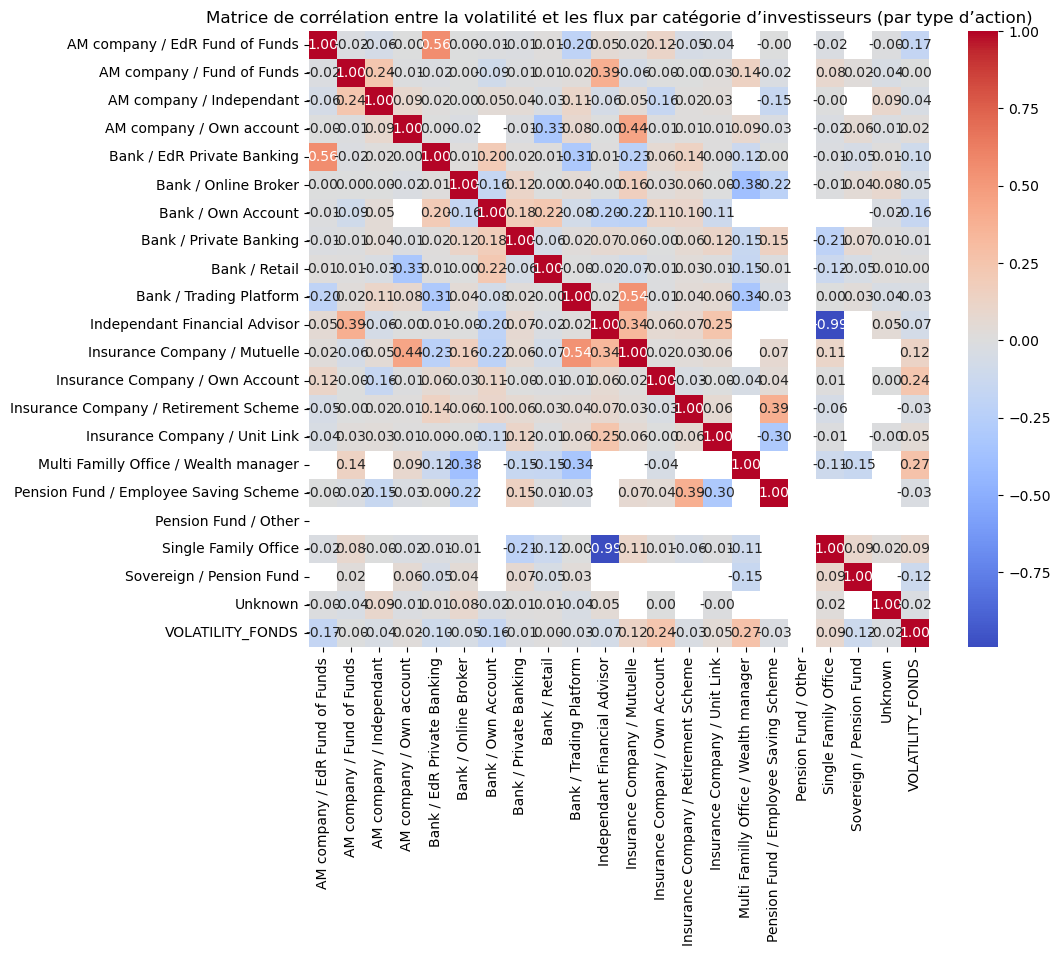

In [124]:
# 3 : Étude de la corrélation : déterminer l'indicateur de performance à utiliser
# Matrix 1 : VOLATILITY

import seaborn as sns
import matplotlib.pyplot as plt

# Changer l'ordre des colonnes
desired_order = [
    'TYPE', 
    'Date', 
    'YEARMONTH', 
    'Month', 
    'BR Segmentation (Business Relationship) (Business Relationship)', 
    'Business Country (Business Relationship) (Business Relationship)', 
    'Net Inflows MTD (€)', 
    'VOLATILITY_FONDS', 
    'VOLATILITY_BENCH', 
    'TRACKING_ERROR', 
    'SHARPE',
    'INFO_RATIO', 
    'ALPHA'
]
passif_perf = passif_perf[desired_order]

# Filtre pour la volatilité 
volatility_passif_perf = [
    'TYPE', 
    'Date', 
    'YEARMONTH', 
    'Month', 
    'BR Segmentation (Business Relationship) (Business Relationship)', 
    'Business Country (Business Relationship) (Business Relationship)', 
    'Net Inflows MTD (€)', 
    'VOLATILITY_FONDS', 
]
passif_perf_volatility = passif_perf[volatility_passif_perf]


# Pivot multi-index : (YearMonth, Share Type) en index, catégories en colonnes
volatility_pivot = passif_perf_volatility.pivot_table(
    index=['YEARMONTH', 'TYPE'], 
    columns='BR Segmentation (Business Relationship) (Business Relationship)', 
    values='Net Inflows MTD (€)',
    aggfunc='sum' # Au cas où plusieurs lignes par (YearMonth, Share Type, catégorie)
)

# Maintenant, on a un DF avec un index à deux niveaux (YEARMONTH, TYPE) et une colonne par catégorie d'investisseur.
# On veut joindre la volatilité correspondante
# La volatilité dépend aussi de (YEARMONTH, TYPE)
# On crée un DataFrame volatilité avec le même index

passif_perf_volatility = passif_perf_volatility[['YEARMONTH', 'TYPE', 'VOLATILITY_FONDS']].drop_duplicates()
passif_perf_volatility = passif_perf_volatility.set_index(['YEARMONTH', 'TYPE'])

# Joindre la volatilité
volatility_merged = volatility_pivot.join(passif_perf_volatility)

# Calcul de la matrice de corrélation
corr_matrix_volatility = volatility_merged.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_volatility, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre la volatilité et les flux par catégorie d’investisseurs (par type d’action)")
plt.show()

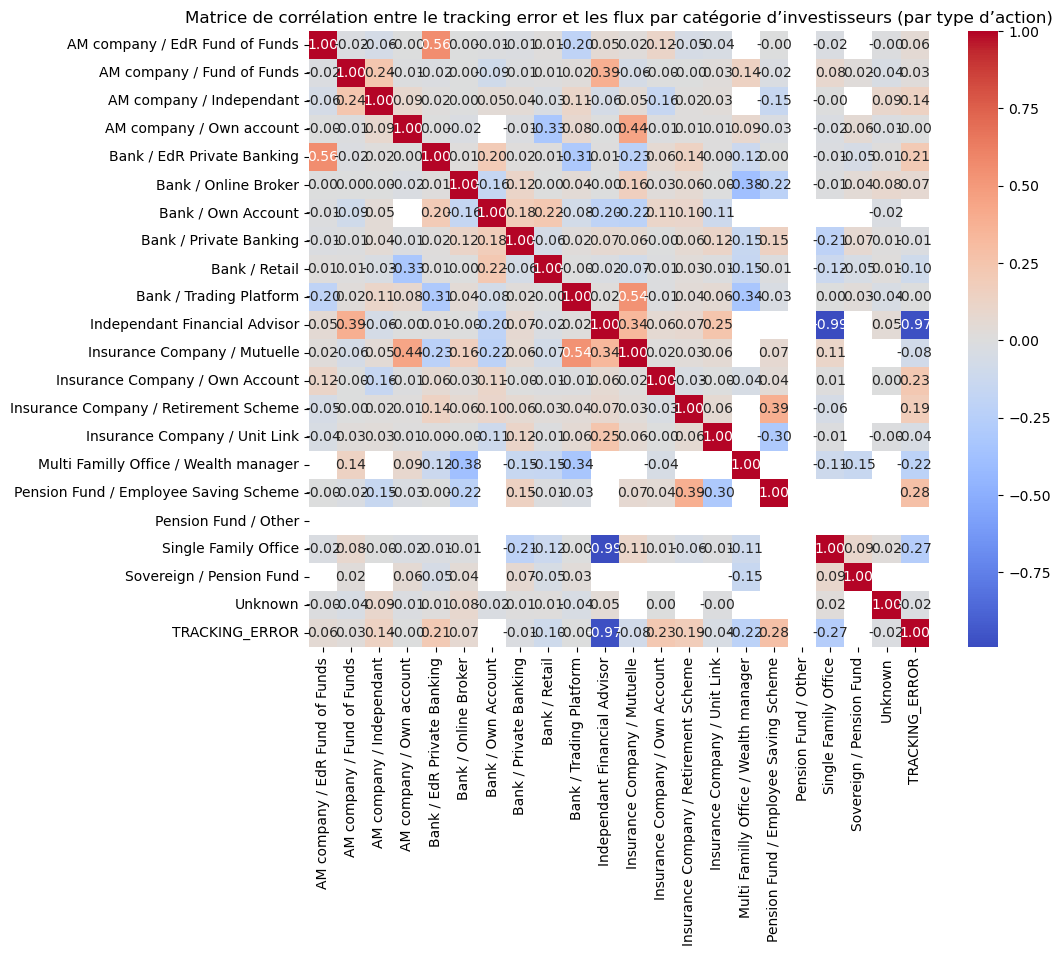

In [125]:
# Matrix 2 : TRACKING ERROR

import seaborn as sns
import matplotlib.pyplot as plt

# Filtre pour tracking error 
tracking_error_passif_perf = [
    'TYPE', 
    'Date', 
    'YEARMONTH', 
    'Month', 
    'BR Segmentation (Business Relationship) (Business Relationship)', 
    'Business Country (Business Relationship) (Business Relationship)', 
    'Net Inflows MTD (€)', 
    'TRACKING_ERROR', 
]
passif_perf_tracking_error = passif_perf[tracking_error_passif_perf]


# Pivot multi-index : (YearMonth, Share Type) en index, catégories en colonnes
tracking_error_pivot = passif_perf_tracking_error.pivot_table(
    index=['YEARMONTH', 'TYPE'], 
    columns='BR Segmentation (Business Relationship) (Business Relationship)', 
    values='Net Inflows MTD (€)',
    aggfunc='sum' # Au cas où plusieurs lignes par (YearMonth, Share Type, catégorie)
)

# Maintenant, on a un DF avec un index à deux niveaux (YEARMONTH, TYPE) et une colonne par catégorie d'investisseur.
# On veut joindre le tracking error correspondant
# Le tracking error dépend aussi de (YEARMONTH, TYPE)
# On crée un DataFrame tracking error avec le même index

passif_perf_tracking_error = passif_perf_tracking_error[['YEARMONTH', 'TYPE', 'TRACKING_ERROR']].drop_duplicates()
passif_perf_tracking_error = passif_perf_tracking_error.set_index(['YEARMONTH', 'TYPE'])

# Joindre le tracking error
tracking_error_merged = tracking_error_pivot.join(passif_perf_tracking_error)

# Calcul de la matrice de corrélation
corr_matrix_tracking_error = tracking_error_merged.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tracking_error, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre le tracking error et les flux par catégorie d’investisseurs (par type d’action)")
plt.show()

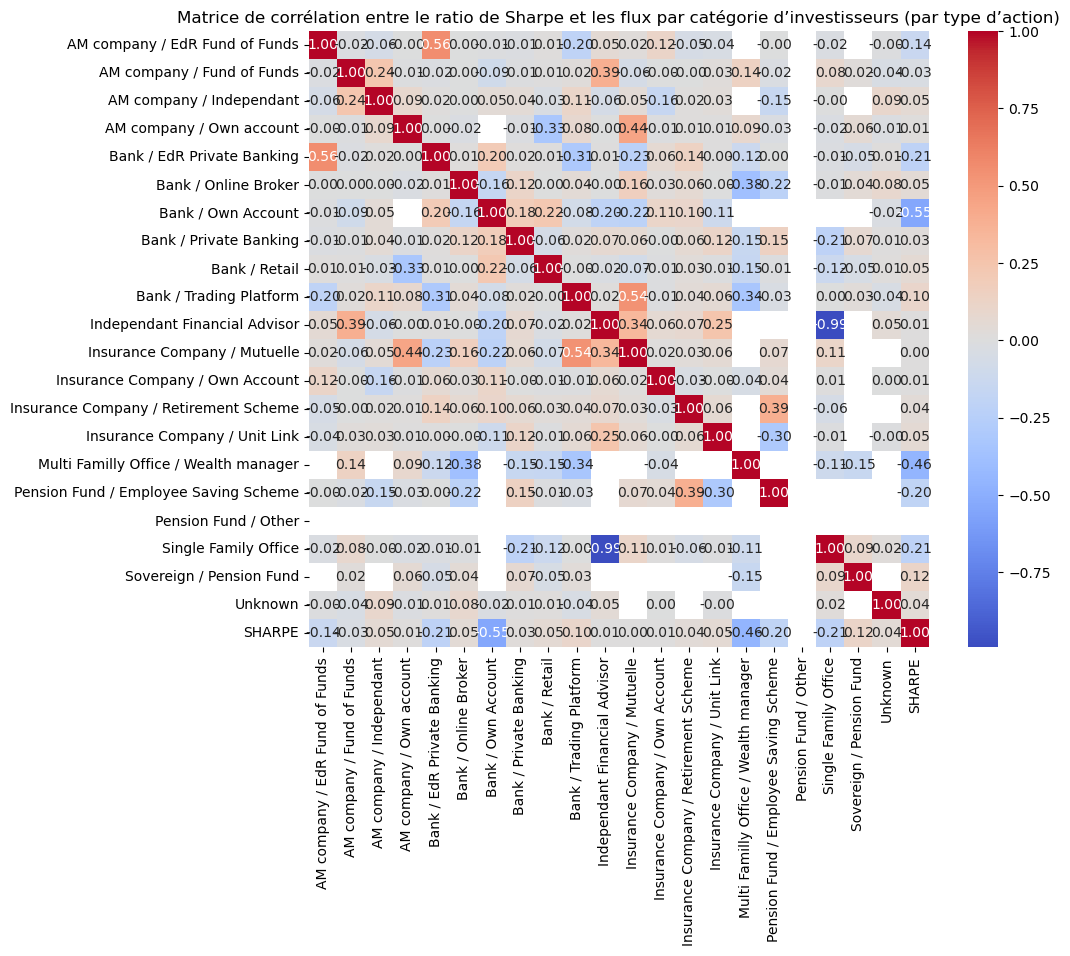

In [126]:
# Matrix 3 : RATIO DE SHARPE 

import seaborn as sns
import matplotlib.pyplot as plt

# Filtre pour le ratio de Sharpe
sharpe_passif_perf = [
    'TYPE', 
    'Date', 
    'YEARMONTH', 
    'Month', 
    'BR Segmentation (Business Relationship) (Business Relationship)', 
    'Business Country (Business Relationship) (Business Relationship)', 
    'Net Inflows MTD (€)', 
    'SHARPE', 
]
passif_perf_sharpe = passif_perf[sharpe_passif_perf]


# Pivot multi-index : (YearMonth, Share Type) en index, catégories en colonnes
sharpe_pivot = passif_perf_sharpe.pivot_table(
    index=['YEARMONTH', 'TYPE'], 
    columns='BR Segmentation (Business Relationship) (Business Relationship)', 
    values='Net Inflows MTD (€)',
    aggfunc='sum' # Au cas où plusieurs lignes par (YearMonth, Share Type, catégorie)
)

# Maintenant, on a un DF avec un index à deux niveaux (YEARMONTH, TYPE) et une colonne par catégorie d'investisseur.
# On veut joindre le ratio de Sharpe correspondant
# Le ratio de Sharpe dépend aussi de (YEARMONTH, TYPE)
# On crée un DataFrame tracking error avec le même index

passif_perf_sharpe = passif_perf_sharpe[['YEARMONTH', 'TYPE', 'SHARPE']].drop_duplicates()
passif_perf_sharpe = passif_perf_sharpe.set_index(['YEARMONTH', 'TYPE'])

# Joindre le ratio de Sharpe
sharpe_merged = sharpe_pivot.join(passif_perf_sharpe)

# Calcul de la matrice de corrélation
corr_matrix_sharpe = sharpe_merged.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_sharpe, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre le ratio de Sharpe et les flux par catégorie d’investisseurs (par type d’action)")
plt.show()

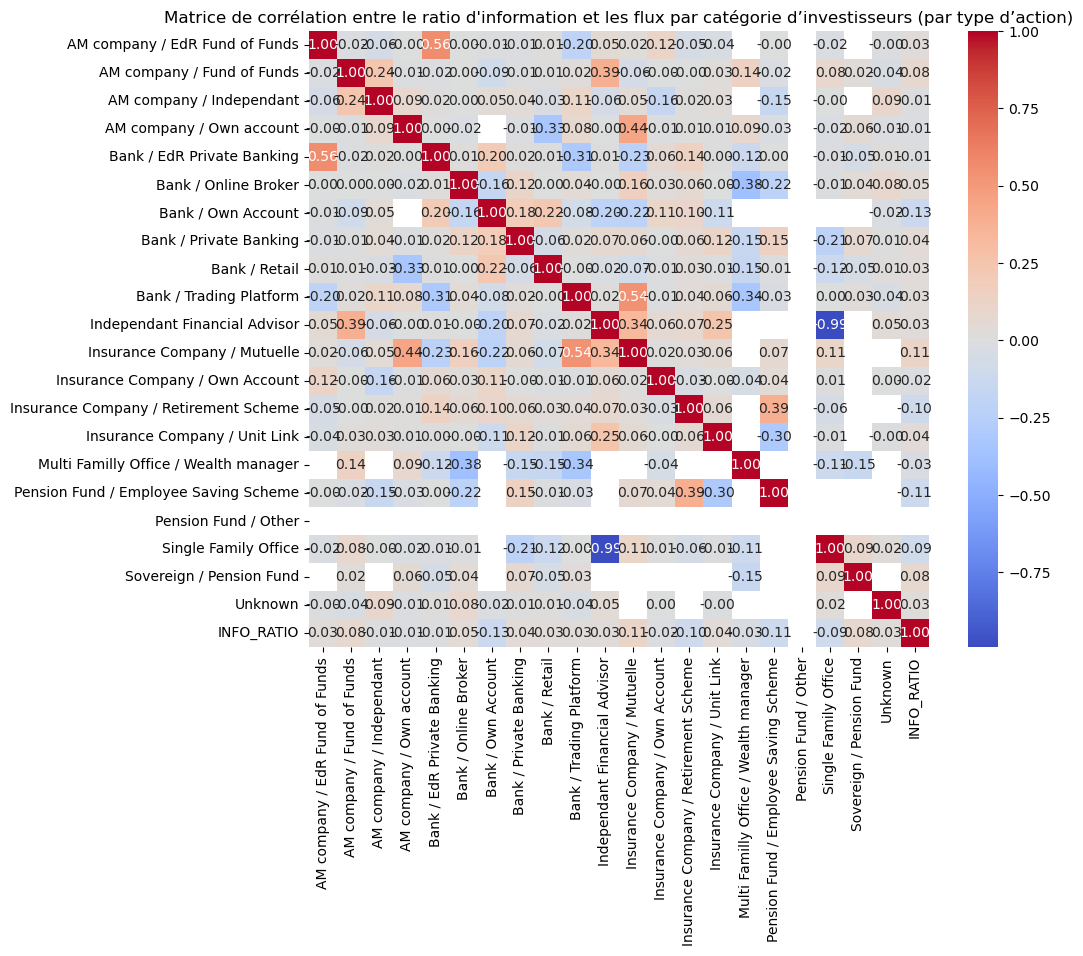

In [127]:
# Matrix 4 : RATIO D'INFORMATION

import seaborn as sns
import matplotlib.pyplot as plt

# Filtre pour le ratio d'information
info_ratio_passif_perf = [
    'TYPE', 
    'Date', 
    'YEARMONTH', 
    'Month', 
    'BR Segmentation (Business Relationship) (Business Relationship)', 
    'Business Country (Business Relationship) (Business Relationship)', 
    'Net Inflows MTD (€)', 
    'INFO_RATIO', 
]
passif_perf_info_ratio = passif_perf[info_ratio_passif_perf]


# Pivot multi-index : (YearMonth, Share Type) en index, catégories en colonnes
info_ratio_pivot = passif_perf_info_ratio.pivot_table(
    index=['YEARMONTH', 'TYPE'], 
    columns='BR Segmentation (Business Relationship) (Business Relationship)', 
    values='Net Inflows MTD (€)',
    aggfunc='sum' # Au cas où plusieurs lignes par (YearMonth, Share Type, catégorie)
)

# Maintenant, on a un DF avec un index à deux niveaux (YEARMONTH, TYPE) et une colonne par catégorie d'investisseur.
# On veut joindre le ratio d'information correspondant
# Le ratio d'information dépend aussi de (YEARMONTH, TYPE)
# On crée un DataFrame tracking error avec le même index

passif_perf_info_ratio = passif_perf_info_ratio[['YEARMONTH', 'TYPE', 'INFO_RATIO']].drop_duplicates()
passif_perf_info_ratio = passif_perf_info_ratio.set_index(['YEARMONTH', 'TYPE'])

# Joindre le ratio d'information
info_ratio_merged = info_ratio_pivot.join(passif_perf_info_ratio)

# Calcul de la matrice de corrélation
corr_matrix_info_ratio = info_ratio_merged.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_info_ratio, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre le ratio d'information et les flux par catégorie d’investisseurs (par type d’action)")
plt.show()

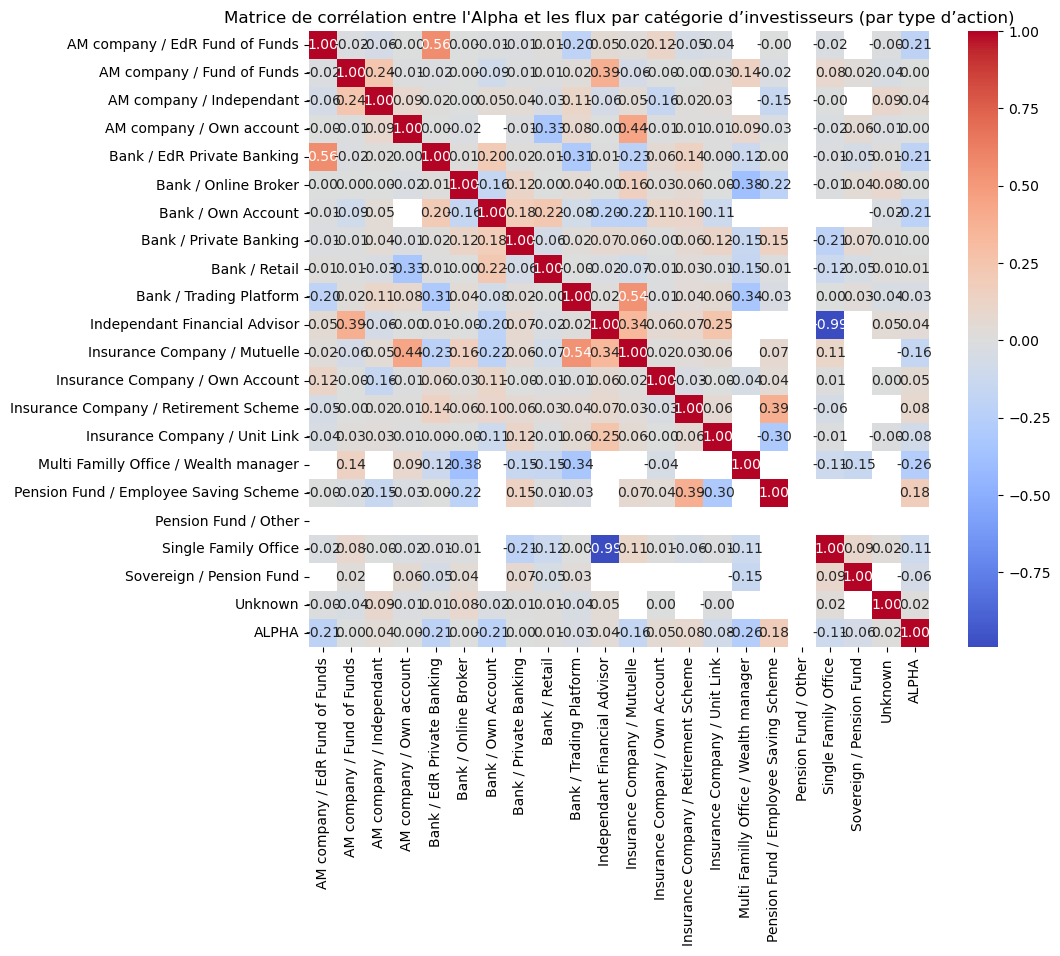

In [128]:
# Matrix 5 : ALPHA 

import seaborn as sns
import matplotlib.pyplot as plt

# Filtre pour l'Alpha
alpha_passif_perf = [
    'TYPE', 
    'Date', 
    'YEARMONTH', 
    'Month', 
    'BR Segmentation (Business Relationship) (Business Relationship)', 
    'Business Country (Business Relationship) (Business Relationship)', 
    'Net Inflows MTD (€)', 
    'ALPHA', 
]
passif_perf_alpha = passif_perf[alpha_passif_perf]


# Pivot multi-index : (YearMonth, Share Type) en index, catégories en colonnes
alpha_pivot = passif_perf_alpha.pivot_table(
    index=['YEARMONTH', 'TYPE'], 
    columns='BR Segmentation (Business Relationship) (Business Relationship)', 
    values='Net Inflows MTD (€)',
    aggfunc='sum' # Au cas où plusieurs lignes par (YearMonth, Share Type, catégorie)
)

# Maintenant, on a un DF avec un index à deux niveaux (YEARMONTH, TYPE) et une colonne par catégorie d'investisseur.
# On veut joindre l'Alpha correspondant
# L'Alpha dépend aussi de (YEARMONTH, TYPE)
# On crée un DataFrame tracking error avec le même index

passif_perf_alpha = passif_perf_alpha[['YEARMONTH', 'TYPE', 'ALPHA']].drop_duplicates()
passif_perf_alpha = passif_perf_alpha.set_index(['YEARMONTH', 'TYPE'])

# Joindre Alpha
alpha_merged = alpha_pivot.join(passif_perf_alpha)

# Calcul de la matrice de corrélation
corr_matrix_alpha = alpha_merged.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_alpha, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre l'Alpha et les flux par catégorie d’investisseurs (par type d’action)")
plt.show()

Accuracy: 0.875
F1-score (weighted): 0.8585473515248796

Rapport de classification:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.20      0.11      0.14         9

    accuracy                           0.88        96
   macro avg       0.56      0.53      0.54        96
weighted avg       0.85      0.88      0.86        96



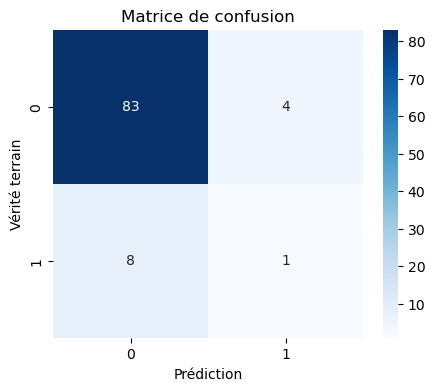

In [129]:
# 4 : Réalisation d'un algorithme de classification binaire
# Indicateur de performance choisi : Volatilité
# Classificateur entrainé par : GradientBoostingClasifier

# Category 1 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Réinitialisation de l'index pour avoir 'YEARMONTH' et 'TYPE' en colonnes
volatility_merged = volatility_merged.reset_index()

# Choisir une catégorie d’investisseur (colonne)
investor_category = 'AM company / EdR Fund of Funds'  # LIGNE À ADAPTER POUR CHAQUE CATÉGORIE D'INVESTISSEURS

if investor_category not in volatility_merged.columns:
    raise ValueError(f"La catégorie {investor_category} n'existe pas dans les colonnes du dataframe.")

# Création de la cible binaire (y)
# Hypothèse : si Net Inflows > 0 => y = 1, sinon 0
volatility_merged['target'] = (volatility_merged[investor_category] > 0).astype(int)

# Car nous allons utiliser la volatilité ET le type d’action comme variables explicatives, nous sélectionnons ces deux colonnes.
X = volatility_merged[['VOLATILITY_FONDS', 'TYPE']]

# One-Hot Encoding pour la colonne 'TYPE' car c'est une variable catégorielle
X = pd.get_dummies(X, columns=['TYPE'], prefix='TYPE')

y = volatility_merged['target']

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choix du classifieur
model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score (weighted):", f1)
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

# Matrice de confusion pour visualiser les prédictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.show()


In [130]:
# Entrainement du modèle pour toutes les autres catégories d'investisseurs 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Liste des catégories d'investisseurs
investor_categories = [
    "AM company / EdR Fund of Funds",
    "AM company / Fund of Funds",
    "AM company / Independant",
    "AM company / Own account",
    "Bank / EdR Private Banking",
    "Bank / Online Broker",
    "Bank / Own Account",
    "Bank / Private Banking",
    "Bank / Retail",
    "Bank / Trading Platform",
    "Independant Financial Advisor",
    "Insurance Company / Mutuelle",
    "Insurance Company / Own Account",
    "Insurance Company / Retirement Scheme",
    "Insurance Company / Unit Link",
    "Multi Familly Office / Wealth manager",
    "Pension Fund / Employee Saving Scheme",
    "Pension Fund / Other",
    "Single Family Office",
    "Sovereign / Pension Fund",
    "Unknown"
]

# Dictionnaire pour stocker les résultats et les modèles
results = {}
models = {}

# Réinitialisation de l'index pour s'assurer que toutes les colonnes sont accessibles
volatility_merged = volatility_merged.reset_index()

# Boucle sur chaque catégorie d'investisseurs
for investor_category in investor_categories:
    print(f"\\nTraitement de la catégorie : {investor_category}")

    if investor_category not in volatility_merged.columns:
        print(f"La catégorie {investor_category} n'existe pas dans les colonnes du dataframe.")
        continue

    # Création de la cible binaire (y)
    volatility_merged['target'] = (volatility_merged[investor_category] > 0).astype(int)

    # Vérification de la distribution des classes
    class_distribution = volatility_merged['target'].value_counts()
    if len(class_distribution) < 2:
        print(f"Skipping {investor_category} : une seule classe trouvée ({class_distribution.to_dict()}).")
        continue

    # Variables explicatives
    X = volatility_merged[['VOLATILITY_FONDS', 'TYPE']]
    X = pd.get_dummies(X, columns=['TYPE'], prefix='TYPE')
    y = volatility_merged['target']

    # Séparation en jeu d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modèle de classification
    model = GradientBoostingClassifier(random_state=42)

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Affichage des résultats
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score (weighted): {f1:.4f}")

    # Sauvegarde des résultats
    results[investor_category] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    # Sauvegarde du modèle
    models[investor_category] = model
    joblib.dump(model, f"model_{investor_category.replace(' / ', '_').replace(' ', '_')}.joblib")


# Résumé des performances
results_df = pd.DataFrame.from_dict({k: v['f1_score'] for k, v in results.items()}, orient='index', columns=['F1-score'])
results_df.sort_values(by='F1-score', ascending=False, inplace=True)
print("\nRésumé des performances :")
print(results_df)


# Accéder aux modèles pour des prédictions futures
# Exemple : Charger un modèle sauvegardé
# model_loaded = joblib.load("model_AM_company_EdR_Fund_of_Funds.joblib")
# predictions = model_loaded.predict(nouveaux_donnees)


\nTraitement de la catégorie : AM company / EdR Fund of Funds
Accuracy: 0.8750
F1-score (weighted): 0.8585


FileNotFoundError: [Errno 2] No such file or directory: 'model_AM_company_EdR_Fund_of_Funds.joblib'

Partie 6 : Analyses détaillées fichier passif

In [95]:
print(passif_ok.columns)

Index(['Business Relationship', 'Fund', 'Share Type', 'Date', 'AUM (€)',
       'Quantity', 'Net Inflows YTD (€)', 'Net Inflows MTD (€)',
       'BR Segmentation (Business Relationship) (Business Relationship)',
       'Reporting Line (Business Relationship) (Business Relationship)',
       'Business Country (Business Relationship) (Business Relationship)',
       'Asset Class (Fund) (EdRAM Product)'],
      dtype='object')


In [108]:
# Tablaux avec pourcentages pour déterminer la catégorie de clients la plus active et sa localisation 

# 1. Pourcentage d'ordres par pays
orders_by_country = passif_ok['Business Country (Business Relationship) (Business Relationship)'].value_counts(normalize=True) * 100
orders_by_country = orders_by_country.reset_index()
orders_by_country.columns = ['Country', 'Order Percentage']
orders_by_country = orders_by_country.sort_values(by='Order Percentage', ascending = False) 

# 2. Pourcentage d'ordres par segmentation
orders_by_segmentation = passif_ok['BR Segmentation (Business Relationship) (Business Relationship)'].value_counts(normalize=True) * 100
orders_by_segmentation = orders_by_segmentation.reset_index()
orders_by_segmentation.columns = ['Segmentation', 'Order Percentage']
orders_by_segmentation = orders_by_segmentation.sort_values(by='Order Percentage', ascending = False) 

# 3. Pourcentage du nombre de parts détenues par pays
quantity_by_country = (
    passif_ok.groupby('Business Country (Business Relationship) (Business Relationship)')['Quantity'].sum()
    / passif_ok['Quantity'].sum() * 100
).reset_index()
quantity_by_country.columns = ['Country', 'Quantity Percentage']
quantity_by_country = quantity_by_country.sort_values(by='Quantity Percentage', ascending = False)  

# 4. Pourcentage du nombre de parts détenues par segmentation
quantity_by_segmentation = (
    passif_ok.groupby('BR Segmentation (Business Relationship) (Business Relationship)')['Quantity'].sum()
    / passif_ok['Quantity'].sum() * 100
).reset_index()
quantity_by_segmentation.columns = ['Segmentation', 'Quantity Percentage']
quantity_by_segmentation = quantity_by_segmentation.sort_values(by='Quantity Percentage', ascending = False) 

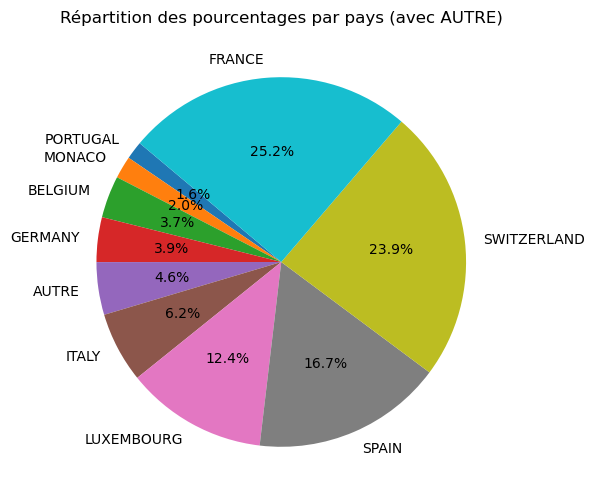

In [114]:
# Combiner les pourcentages < 1.5% dans "AUTRE"
threshold = 1.5
orders_by_country['Category'] = orders_by_country['Country']  # Copie de la colonne 'Country'

# Regrouper les petites valeurs en "AUTRE"
orders_by_country.loc[orders_by_country['Order Percentage'] < threshold, 'Category'] = 'AUTRE'

# Grouper les données par 'Category' et sommer les pourcentages
grouped_df = orders_by_country.groupby('Category')['Order Percentage'].sum().reset_index()

grouped_df = grouped_df.sort_values(by='Order Percentage', ascending=True)

# Création du pie chart
plt.figure(figsize=(8, 6))  # Taille de la figure
plt.pie(
    grouped_df['Order Percentage'],
    labels=grouped_df['Category'],
    autopct='%1.1f%%',  # Format d'affichage des pourcentages
    startangle=140  # Angle de départ
)
plt.title("Répartition des pourcentages par pays (avec AUTRE)")
plt.show()


In [112]:
orders_by_country

,Country,Order Percentage
0,FRANCE,25.162040
1,SWITZERLAND,23.917036
2,SPAIN,16.676569
3,LUXEMBOURG,12.350113
4,ITALY,6.171006
5,GERMANY,3.910554
6,BELGIUM,3.678298
7,MONACO,1.955277
8,PORTUGAL,1.577185
9,ANDORRA,1.407043


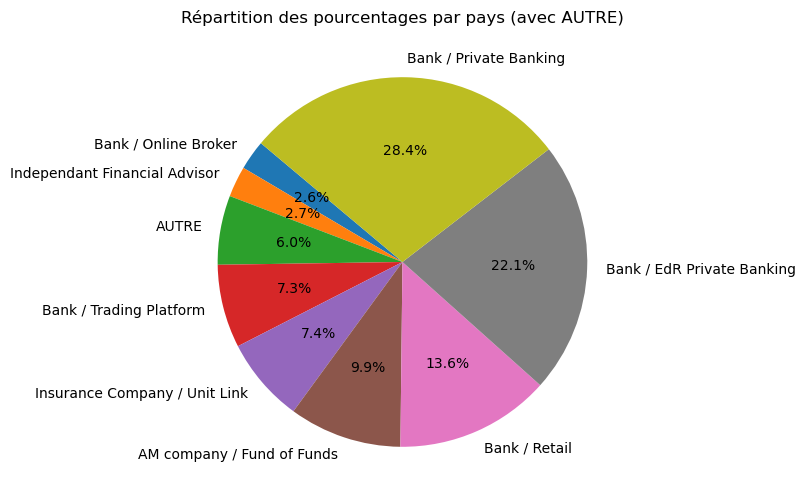

In [115]:
# Combiner les pourcentages < 1.5% dans "AUTRE"
threshold = 1.5
orders_by_segmentation['Category'] = orders_by_segmentation['Segmentation']  # Copie de la colonne 'Country'

# Regrouper les petites valeurs en "AUTRE"
orders_by_segmentation.loc[orders_by_segmentation['Order Percentage'] < threshold, 'Category'] = 'AUTRE'

# Grouper les données par 'Category' et sommer les pourcentages
grouped_df = orders_by_segmentation.groupby('Category')['Order Percentage'].sum().reset_index()

grouped_df = grouped_df.sort_values(by='Order Percentage', ascending=True)

# Création du pie chart
plt.figure(figsize=(8, 6))  # Taille de la figure
plt.pie(
    grouped_df['Order Percentage'],
    labels=grouped_df['Category'],
    autopct='%1.1f%%',  # Format d'affichage des pourcentages
    startangle=140  # Angle de départ
)
plt.title("Répartition des pourcentages par pays (avec AUTRE)")
plt.show()


In [111]:
orders_by_segmentation

,Segmentation,Order Percentage
0,Bank / Private Banking,28.440640
1,Bank / EdR Private Banking,22.058982
2,Bank / Retail,13.568111
3,AM company / Fund of Funds,9.860106
4,Insurance Company / Unit Link,7.432213
5,Bank / Trading Platform,7.289079
6,Independant Financial Advisor,2.700659
7,Bank / Online Broker,2.606136
8,AM company / Independant,1.344928
9,AM company / EdR Fund of Funds,1.112671


In [110]:
quantity_by_country

,Country,Quantity Percentage
5,FRANCE,34.790042
21,SPAIN,24.822044
23,SWITZERLAND,13.365885
2,BELGIUM,8.629681
11,ITALY,6.759225
13,LUXEMBOURG,3.925056
29,WORLD,1.766324
20,SOUTH KOREA,1.227209
6,GERMANY,1.224989
17,PORTUGAL,0.885537


In [109]:
quantity_by_segmentation

,Segmentation,Quantity Percentage
7,Bank / Private Banking,20.724565
1,AM company / Fund of Funds,18.447202
4,Bank / EdR Private Banking,16.653898
14,Insurance Company / Unit Link,16.413098
12,Insurance Company / Own Account,7.559742
8,Bank / Retail,5.984871
0,AM company / EdR Fund of Funds,2.696650
19,Sovereign / Pension Fund,2.691041
11,Insurance Company / Mutuelle,2.077830
16,Pension Fund / Employee Saving Scheme,1.576694


In [113]:
print("Orders by Country:")
print(orders_by_country)

Orders by Country:
           Country  Order Percentage
0           FRANCE         25.162040
1      SWITZERLAND         23.917036
2            SPAIN         16.676569
3       LUXEMBOURG         12.350113
4            ITALY          6.171006
5          GERMANY          3.910554
6          BELGIUM          3.678298
7           MONACO          1.955277
8         PORTUGAL          1.577185
9          ANDORRA          1.407043
10           WORLD          0.793994
11         UNKNOWN          0.456411
12       SINGAPORE          0.305174
13          SWEDEN          0.237658
14   UNITED STATES          0.186345
15  UNITED KINGDOM          0.172842
16         AUSTRIA          0.151237
17          ISRAEL          0.143135
18     SOUTH KOREA          0.132332
19          TAIWAN          0.132332
20         DENMARK          0.129632
21       HONG KONG          0.094523
22           CHILE          0.086421
23        GUERNSEY          0.075618
24   LIECHTENSTEIN          0.032408
25         URUGUAY 

In [114]:
print("\nOrders by Segmentation:")
print(orders_by_segmentation)


Orders by Segmentation:
                             Segmentation  Order Percentage
0                  Bank / Private Banking         28.440640
1              Bank / EdR Private Banking         22.058982
2                           Bank / Retail         13.568111
3              AM company / Fund of Funds          9.860106
4           Insurance Company / Unit Link          7.432213
5                 Bank / Trading Platform          7.289079
6           Independant Financial Advisor          2.700659
7                    Bank / Online Broker          2.606136
8                AM company / Independant          1.344928
9          AM company / EdR Fund of Funds          1.112671
10        Insurance Company / Own Account          0.996543
11               AM company / Own account          0.912823
12                                Unknown          0.456411
13           Insurance Company / Mutuelle          0.378092
14  Insurance Company / Retirement Scheme          0.234957
15             

In [115]:
print("\nQuantity by Country:")
print(quantity_by_country)


Quantity by Country:
           Country  Quantity Percentage
5           FRANCE            34.790042
21           SPAIN            24.822044
23     SWITZERLAND            13.365885
2          BELGIUM             8.629681
11           ITALY             6.759225
13      LUXEMBOURG             3.925056
29           WORLD             1.766324
20     SOUTH KOREA             1.227209
6          GERMANY             1.224989
17        PORTUGAL             0.885537
1          AUSTRIA             0.624115
19       SINGAPORE             0.591653
0          ANDORRA             0.278458
15          MONACO             0.239678
8         GUERNSEY             0.210646
27         UNKNOWN             0.185293
25  UNITED KINGDOM             0.181088
9        HONG KONG             0.107051
26   UNITED STATES             0.078922
12   LIECHTENSTEIN             0.058521
16            PERU             0.034359
3            CHILE             0.006595
22          SWEDEN             0.003198
24          TAIWAN

In [117]:
print("\nQuantity by Segmentation :")
print(quantity_by_segmentation)


Quantity by Segmentation :
                             Segmentation  Quantity Percentage
7                  Bank / Private Banking            20.724565
1              AM company / Fund of Funds            18.447202
4              Bank / EdR Private Banking            16.653898
14          Insurance Company / Unit Link            16.413098
12        Insurance Company / Own Account             7.559742
8                           Bank / Retail             5.984871
0          AM company / EdR Fund of Funds             2.696650
19               Sovereign / Pension Fund             2.691041
11           Insurance Company / Mutuelle             2.077830
16  Pension Fund / Employee Saving Scheme             1.576694
9                 Bank / Trading Platform             1.499693
3                AM company / Own account             1.319140
13  Insurance Company / Retirement Scheme             0.756835
18                   Single Family Office             0.520278
15  Multi Familly Office / 

In [120]:
print(passif_annees[2021].columns)

Index(['Share Type', 'Date', 'AUM (€)', 'Net Inflows YTD (€)',
       'Net Inflows MTD (€)',
       'BR Segmentation (Business Relationship) (Business Relationship)',
       'Business Country (Business Relationship) (Business Relationship)',
       'Month'],
      dtype='object')


In [ ]:
# Graphique pour étudier la balance annuelle de collecte/décollecte 



Partie 7 : Streamlit - EDMIND - Logiciel Assistant Analytique 